# SUPPLY CHAIN ANALYTICS PROJECT

## I) PROJECT DESCRIPTION

The project provides a real-world dataset focusing on supply chain analytics. As the data analyst for Just In Time, you will help solve key shipment and inventory management challenges, analyze supply chain inefficiencies to inform business stakeholders about potential problems and propose structural business improvements.

## II) METHODOLOGY

### Business demand analysis

**Requirements:** Create dashboard to analyze the business problem and improve the supply chain’s efficiency

**Method:** descriptive, exploratory and diagnostic analysis

**Tool used:** Python (Data preprocessing, data cleaning, EDA, inventory segmentation)

**Stakeholders:**

**_Sales Manager:_** Overview and keep track of customer’s demand and product sales

**_Inventory Manager:_** Control the inventory flow including order fulfillment, storing and distribution

**_Shipping Manager:_** Overseeing daily shipping and distribution operations to customers



In [50]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## III) DATA PREPROCESSING

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data overview

In [52]:
fulfillment=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/DA/fulfillment.csv')
fulfillment.head()

,Product Name,Warehouse Order Fulfillment (days)
0,Perfect Fitness Perfect Rip Deck,8.3
1,Nike Men's Dri-FIT Victory Golf Polo,6.6
2,O'Brien Men's Neoprene Life Vest,5.5
3,Nike Men's Free 5.0+ Running Shoe,9.4
4,Under Armour Girls' Toddler Spine Surge Runni,6.3


In [53]:
fulfillment.shape

(118, 2)

In [54]:
inventory=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/DA/inventory.csv')
inventory.head()

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit
0,Perfect Fitness Perfect Rip Deck,201712,0,0.69517
1,Nike Men's Dri-FIT Victory Golf Polo,201712,2,1.29291
2,O'Brien Men's Neoprene Life Vest,201712,0,0.56531
3,Nike Men's Free 5.0+ Running Shoe,201712,1,1.26321
4,Under Armour Girls' Toddler Spine Surge Runni,201712,0,1.47648


In [55]:
inventory.shape

(4200, 4)

In [56]:
order=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/DA/orders_and_shipments.csv')
order.head()

,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,...,Customer Country,Warehouse Country,Shipment Year,Shipment Month,Shipment Day,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,...,Mexico,Puerto Rico,2015,2,27,Standard Class,4,400,0.25,200
1,4133,10320,201503,2015,3,2,07:37,1,Fan Shop,Fishing,...,Brazil,Puerto Rico,2015,3,6,Standard Class,4,400,0.09,200
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,...,Mexico,Puerto Rico,2015,4,20,Standard Class,4,400,0.06,200
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.15,200
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.13,200


In [57]:
order.shape

(30871, 24)

The dataset provides three data tables including order_and_shipment, inventory and fulfillment. After examining the data fields, I noticed that the dataset generally represents the following key information

**Customer:** General information about customers including identifiers and addresses

**Order:** Information about the order including date of order, product and quantity ordered, order value

**Shipment:** Shipping information including shipping date, shipping mode

**Product:** Specific information about the ordered item including product name, product category, product department

**Warehouse Inventory:** Information on inventory management for each product name including monthly inventory, warehouse location, storage costs, order fulfillment



### Data cleaning

In [58]:
fulfillment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Product Name                          118 non-null    object 
 1    Warehouse Order Fulfillment (days)   118 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


In [59]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product Name             4200 non-null   object 
 1    Year Month              4200 non-null   int64  
 2    Warehouse Inventory     4200 non-null   int64  
 3   Inventory Cost Per Unit  4200 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 131.4+ KB


In [60]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30871 entries, 0 to 30870
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Order ID                     30871 non-null  int64 
 1    Order Item ID               30871 non-null  int64 
 2    Order YearMonth             30871 non-null  int64 
 3    Order Year                  30871 non-null  int64 
 4    Order Month                 30871 non-null  int64 
 5    Order Day                   30871 non-null  int64 
 6   Order Time                   30871 non-null  object
 7   Order Quantity               30871 non-null  int64 
 8   Product Department           30871 non-null  object
 9   Product Category             30871 non-null  object
 10  Product Name                 30871 non-null  object
 11   Customer ID                 30871 non-null  int64 
 12  Customer Market              30871 non-null  object
 13  Customer Region              30

We have some unecessary columns in the dataset. For example, the Order Item ID column show the ID of the product in the _order_and_shipment_ table but it is not shown in the _fulfillment_ and _inventory_ table. So drop this column

In [61]:
#fix the column name by trimming the white space in the beginning and the end
order.columns = order.columns.str.strip()
inventory.columns = inventory.columns.str.strip()
fulfillment.columns = fulfillment.columns.str.strip()

In [62]:
#drop unecessary columns
order = order.drop(['Order Item ID','Order Time'], axis=1)
order.columns

Index(['Order ID', 'Order YearMonth', 'Order Year', 'Order Month', 'Order Day',
       'Order Quantity', 'Product Department', 'Product Category',
       'Product Name', 'Customer ID', 'Customer Market', 'Customer Region',
       'Customer Country', 'Warehouse Country', 'Shipment Year',
       'Shipment Month', 'Shipment Day', 'Shipment Mode',
       'Shipment Days - Scheduled', 'Gross Sales', 'Discount %', 'Profit'],
      dtype='object')

The columns of time feature have the datatype of int64, change them to string value

In [63]:
#change the datatype of time feature columns
order[['Order Year','Order Month','Order Day','Shipment Year','Shipment Month','Shipment Day']] = order[['Order Year','Order Month','Order Day','Shipment Year','Shipment Month','Shipment Day']].astype(str)

The column Gross Sales and Profit in _order_and_shipment_ table have the datatype of int64, change them to the float type for later calculation

In [64]:
#change the datatype of Gross Sales and Profit columns
order[['Gross Sales','Profit']] = order[['Gross Sales','Profit']].astype(float)

The column Discount has string value, change it to float value

In [65]:
# Remove leading and trailing spaces from the 'Discount %' column
order['Discount %'] = order['Discount %'].str.strip()

# Replace '-' with 0 in the 'Discount %' column
order['Discount %'] = order['Discount %'].replace('-', float('0'))

# Change the datatype of 'Discount %' column to float
order['Discount %'] = order['Discount %'].astype(float)

order['Discount %']

,Discount %
0,0.25
1,0.09
2,0.06
3,0.15
4,0.13
...,...
30866,0.06
30867,0.12
30868,0.09
30869,0.02


The column Customer Country contains some special characters. For example, Peru has the special characters for letter "u". We will replace them

In [66]:
order['Customer Country'].unique()

array(['Mexico', 'Brazil', 'Denmark', 'Netherlands', 'Germany', 'China',
       'Indonesia', 'Pakistan', 'India', 'USA', 'Hungary', 'Sudan',
       'Democratic Republic of Congo', 'Poland', 'Togo', 'Guatemala',
       'Panama', 'Chile', 'France', 'Sweden', 'Dominican�Republic',
       'Venezuela', 'South Korea', 'Madagascar', 'Iran', 'Cuba',
       'Nicaragua', 'United Kingdom', 'Afghanistan', 'Singapore',
       'Morocco', 'Spain', 'Niger', 'Turkey', 'South Africa', 'Iraq',
       'Honduras', 'Italy', 'Australia', 'Cote d�Ivoire', 'Croatia',
       'Ecuador', 'Syria', 'Haiti', 'Bangladesh', 'Argentina', 'Romania',
       'El Salvador', 'Vietnam', 'Japan', 'Nigeria', 'Belarus',
       'Uzbekistan', 'Egypt', 'Albania', 'Georgia', 'Cameroon',
       'Colombia', 'New zealand', 'Canada', 'Thailand', 'Senegal',
       'Russia', 'Per�', 'Algeria�', 'Ukraine', 'Belgium', 'Philippines',
       'Austria', 'Uruguay', 'Malaysia', 'Hong Kong', 'Saudi Arabia',
       'Switzerland', 'Ireland', 'Bulg

In [67]:
#replace the special characters in the Customer Country column
order['Customer Country'] = order['Customer Country'].replace({
    'Dominican�Republic': 'Dominican Republic',
    'Cote d�Ivoire': 'Cote d Ivoire', # Added a comma at the end of this line
    'Per�': 'Peru',
    'Algeria�': 'Algeria',
    'Israel�':'Israel',
    'Ben�n': 'Benin'
})
order['Customer Country'].unique()

array(['Mexico', 'Brazil', 'Denmark', 'Netherlands', 'Germany', 'China',
       'Indonesia', 'Pakistan', 'India', 'USA', 'Hungary', 'Sudan',
       'Democratic Republic of Congo', 'Poland', 'Togo', 'Guatemala',
       'Panama', 'Chile', 'France', 'Sweden', 'Dominican Republic',
       'Venezuela', 'South Korea', 'Madagascar', 'Iran', 'Cuba',
       'Nicaragua', 'United Kingdom', 'Afghanistan', 'Singapore',
       'Morocco', 'Spain', 'Niger', 'Turkey', 'South Africa', 'Iraq',
       'Honduras', 'Italy', 'Australia', 'Cote d Ivoire', 'Croatia',
       'Ecuador', 'Syria', 'Haiti', 'Bangladesh', 'Argentina', 'Romania',
       'El Salvador', 'Vietnam', 'Japan', 'Nigeria', 'Belarus',
       'Uzbekistan', 'Egypt', 'Albania', 'Georgia', 'Cameroon',
       'Colombia', 'New zealand', 'Canada', 'Thailand', 'Senegal',
       'Russia', 'Peru', 'Algeria', 'Ukraine', 'Belgium', 'Philippines',
       'Austria', 'Uruguay', 'Malaysia', 'Hong Kong', 'Saudi Arabia',
       'Switzerland', 'Ireland', 'Bulga

Checking for missing value

In [68]:
#checking for missing value
order_missing_count = order.isna().sum()
print(order_missing_count)


Order ID                     0
Order YearMonth              0
Order Year                   0
Order Month                  0
Order Day                    0
Order Quantity               0
Product Department           0
Product Category             0
Product Name                 0
Customer ID                  0
Customer Market              0
Customer Region              0
Customer Country             0
Warehouse Country            0
Shipment Year                0
Shipment Month               0
Shipment Day                 0
Shipment Mode                0
Shipment Days - Scheduled    0
Gross Sales                  0
Discount %                   0
Profit                       0
dtype: int64


In [69]:
inventory_missing_count = inventory.isna().sum()
print(inventory_missing_count)

Product Name               0
Year Month                 0
Warehouse Inventory        0
Inventory Cost Per Unit    0
dtype: int64


In [70]:
fulfillment_missing_count = fulfillment.isna().sum()
print(fulfillment_missing_count)

Product Name                          0
Warehouse Order Fulfillment (days)    0
dtype: int64


There are no missing value in all three tables. This dataset seems to have already been clean

Checking for duplicates

In [71]:
#checking for duplicates
duplicate_rows = order[order.duplicated()]

In [72]:
duplicate_rows = inventory[inventory.duplicated()]

In [73]:
duplicate_rows = inventory[inventory.duplicated()]

There are no duplicates. This dataset's quality is good!

Checking for which product category and product department the product name belongs to

In [74]:
# Create a new DataFrame with isolated columns
product_info = order[['Product Name', 'Product Category', 'Product Department']]
#Drop the duplicates to have the distinct product names
product = product_info.drop_duplicates()
product

,Product Name,Product Category,Product Department
0,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop
157,Pelican Sunstream 100 Kayak,Water Sports,Fan Shop
294,Diamondback Women's Serene Classic Comfort Bi,Camping & Hiking,Fan Shop
418,O'Brien Men's Neoprene Life Vest,Indoor/Outdoor Games,Fan Shop
463,Team Golf Texas Longhorns Putter Grip,Accessories,Outdoors
...,...,...,...
15458,First aid kit,Health and Beauty,Health and Beauty
15464,Rock music,Music,Discs Shop
15621,Men's gala suit,Men's Clothing,Apparel
18869,Toys,Toys,Fan Shop


In [75]:
# Export the product information to a new CSV file
product.to_csv('product.csv', index=False)

In inventory table, we only have the storage cost for each product name. In order to know the average storage cost for each product category and product department, we will merge the _product_ table and the _inventory_ table with the key = Product Name

In [76]:
inventory

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit
0,Perfect Fitness Perfect Rip Deck,201712,0,0.69517
1,Nike Men's Dri-FIT Victory Golf Polo,201712,2,1.29291
2,O'Brien Men's Neoprene Life Vest,201712,0,0.56531
3,Nike Men's Free 5.0+ Running Shoe,201712,1,1.26321
4,Under Armour Girls' Toddler Spine Surge Runni,201712,0,1.47648
...,...,...,...,...
4195,TaylorMade 2017 Purelite Stand Bag,201501,0,1.44662
4196,Ogio Race Golf Shoes,201501,0,0.10310
4197,GolfBuddy VT3 GPS Watch,201501,0,1.77747
4198,Titleist Small Wheeled Travel Cover,201501,0,0.15244


In [77]:
product

,Product Name,Product Category,Product Department
0,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop
157,Pelican Sunstream 100 Kayak,Water Sports,Fan Shop
294,Diamondback Women's Serene Classic Comfort Bi,Camping & Hiking,Fan Shop
418,O'Brien Men's Neoprene Life Vest,Indoor/Outdoor Games,Fan Shop
463,Team Golf Texas Longhorns Putter Grip,Accessories,Outdoors
...,...,...,...
15458,First aid kit,Health and Beauty,Health and Beauty
15464,Rock music,Music,Discs Shop
15621,Men's gala suit,Men's Clothing,Apparel
18869,Toys,Toys,Fan Shop


In [78]:
inventory_merge = pd.merge(inventory, product, on='Product Name', how='left')
inventory_merge

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department
0,Perfect Fitness Perfect Rip Deck,201712,0,0.69517,Cleats,Apparel
1,Nike Men's Dri-FIT Victory Golf Polo,201712,2,1.29291,Women's Apparel,Golf
2,O'Brien Men's Neoprene Life Vest,201712,0,0.56531,Indoor/Outdoor Games,Fan Shop
3,Nike Men's Free 5.0+ Running Shoe,201712,1,1.26321,Cardio Equipment,Footwear
4,Under Armour Girls' Toddler Spine Surge Runni,201712,0,1.47648,Shop By Sport,Golf
...,...,...,...,...,...,...
4195,TaylorMade 2017 Purelite Stand Bag,201501,0,1.44662,Golf Gloves,Outdoors
4196,Ogio Race Golf Shoes,201501,0,0.10310,Golf Bags & Carts,Outdoors
4197,GolfBuddy VT3 GPS Watch,201501,0,1.77747,Kids' Golf Clubs,Outdoors
4198,Titleist Small Wheeled Travel Cover,201501,0,0.15244,Golf Gloves,Outdoors


There are some missing value from the merged table. Checking them

In [79]:
#Checking the missing value
missing_count = inventory_merge.isna().sum()
missing_count

,0
Product Name,0
Year Month,0
Warehouse Inventory,0
Inventory Cost Per Unit,0
Product Category,175
Product Department,175


In [80]:
null_records = inventory_merge[(inventory_merge['Product Category'].isna()) | (inventory_merge['Product Department'].isna())]
null_records

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department
56,Dell Laptop,201712,14,1.56369,NaN,NaN
114,SOLE E35 Elliptical,201712,1,0.36106,NaN,NaN
115,Bushnell Pro X7 Jolt Slope Rangefinder,201712,9,2.22684,NaN,NaN
116,SOLE E25 Elliptical,201712,23,1.84297,NaN,NaN
117,Bowflex SelectTech 1090 Dumbbells,201712,36,1.49431,NaN,NaN
...,...,...,...,...,...,...
4068,Dell Laptop,201502,37,2.16324,NaN,NaN
4126,SOLE E35 Elliptical,201502,3,1.85317,NaN,NaN
4127,Bushnell Pro X7 Jolt Slope Rangefinder,201502,35,1.22691,NaN,NaN
4128,SOLE E25 Elliptical,201502,18,1.07032,NaN,NaN


In [81]:
null_records['Product Name'].unique()

array(['Dell Laptop', 'SOLE E35 Elliptical',
       'Bushnell Pro X7 Jolt Slope Rangefinder', 'SOLE E25 Elliptical',
       'Bowflex SelectTech 1090 Dumbbells'], dtype=object)

There are 5 product names that appear in the _inventory_ table but not in the _order_ table. This means that these are items that are in the company's inventory but have not been ordered by the customer. So it's impossible to determine which product category and product department those product names belong to

After investigating carefully, I decided to keep these product names as they account for a considerable amount of storage cost

In [82]:
inventory_merge['Product Category'].fillna('None', inplace=True)
inventory_merge['Product Department'].fillna('None', inplace=True)
inventory_merge[inventory_merge['Product Department'].isna()]

/tmp/ipython-input-2733241254.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  inventory_merge['Product Category'].fillna('None', inplace=True)
/tmp/ipython-input-2733241254.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department


### Feature creation

Create datetime feature

In [83]:
from datetime import datetime
#Create order date and shipment date features from the year, month, day column
order['Order Date'] = order['Order Year'].astype(str) + '/' + order['Order Month'].astype(str) + '/' + order['Order Day'].astype(str)
order['Order Date'] = pd.to_datetime(order['Order Date'])
order['Order Date'] = order['Order Date'].dt.strftime('%Y/%m/%d')
order['Order YearMonth'] = order['Order YearMonth'].astype(str)

order['Shipment Date'] = order['Shipment Year'].astype(str) + '/' + order['Shipment Month'].astype(str) + '/' + order['Shipment Day'].astype(str)
order['Shipment Date'] = pd.to_datetime(order['Shipment Date'])
order['Shipment Date'] = order['Shipment Date'].dt.strftime('%Y-%m-%d')
order['Shipment YearMonth'] = order['Shipment Year'].astype(str) + '-' + order['Shipment Month'].astype(str)

In [84]:
inventory_merge['Year Month']=pd.to_datetime(inventory_merge['Year Month'], format='%Y%m').dt.strftime('%Y/%m')
inventory_merge

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department
0,Perfect Fitness Perfect Rip Deck,2017/12,0,0.69517,Cleats,Apparel
1,Nike Men's Dri-FIT Victory Golf Polo,2017/12,2,1.29291,Women's Apparel,Golf
2,O'Brien Men's Neoprene Life Vest,2017/12,0,0.56531,Indoor/Outdoor Games,Fan Shop
3,Nike Men's Free 5.0+ Running Shoe,2017/12,1,1.26321,Cardio Equipment,Footwear
4,Under Armour Girls' Toddler Spine Surge Runni,2017/12,0,1.47648,Shop By Sport,Golf
...,...,...,...,...,...,...
4195,TaylorMade 2017 Purelite Stand Bag,2015/01,0,1.44662,Golf Gloves,Outdoors
4196,Ogio Race Golf Shoes,2015/01,0,0.10310,Golf Bags & Carts,Outdoors
4197,GolfBuddy VT3 GPS Watch,2015/01,0,1.77747,Kids' Golf Clubs,Outdoors
4198,Titleist Small Wheeled Travel Cover,2015/01,0,0.15244,Golf Gloves,Outdoors


Create shipment feature

In [85]:
#Create shipping time feature
order['Shipping Time'] = pd.to_datetime(order['Shipment Date']) - pd.to_datetime(order['Order Date'])
order['Shipping Time'] = order['Shipping Time'].dt.days

#Create delay shipment feature
def calculate_delay(row):
    if row['Shipping Time'] > row['Shipment Days - Scheduled']:
        return 'Late'
    else:
        return 'On time'

order['Delay Shipment'] = order.apply(calculate_delay, axis=1)
order

,Order ID,Order YearMonth,Order Year,Order Month,Order Day,Order Quantity,Product Department,Product Category,Product Name,Customer ID,...,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Shipment YearMonth,Shipping Time,Delay Shipment
0,3535,201502,2015,2,21,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,7840,...,Standard Class,4,400.0,0.25,200.0,2015/02/21,2015-02-27,2015-2,6,Late
1,4133,201503,2015,3,2,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,1203,...,Standard Class,4,400.0,0.09,200.0,2015/03/02,2015-03-06,2015-3,4,On time
2,7396,201504,2015,4,18,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,10866,...,Standard Class,4,400.0,0.06,200.0,2015/04/18,2015-04-20,2015-4,2,On time
3,11026,201506,2015,6,10,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,...,Standard Class,4,400.0,0.15,200.0,2015/06/10,2015-06-12,2015-6,2,On time
4,11026,201506,2015,6,10,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,...,Standard Class,4,400.0,0.13,200.0,2015/06/10,2015-06-12,2015-6,2,On time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,73246,201712,2017,12,5,1,Fan Shop,Toys,Toys,16799,...,Standard Class,4,12.0,0.06,6.0,2017/12/05,2017-12-11,2017-12,6,Late
30867,7908,201504,2015,4,26,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,11950,...,Standard Class,4,30.0,0.12,68.0,2015/04/26,2015-04-30,2015-4,4,On time
30868,29326,201603,2016,3,4,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,8161,...,Second Class,2,30.0,0.09,68.0,2016/03/04,2016-03-06,2016-3,2,On time
30869,63308,201707,2017,7,13,1,Fan Shop,Hunting & Shooting,insta-bed Neverflat Air Mattress,5733,...,Second Class,2,150.0,0.02,60.0,2017/07/13,2017-07-17,2017-7,4,Late


In [86]:
order['Shipping Time'].describe()

,Shipping Time
count,30871.000000
mean,3.560753
std,131.195817
min,-975.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,978.000000


Text(0.5, 1.0, 'Shipping Time')

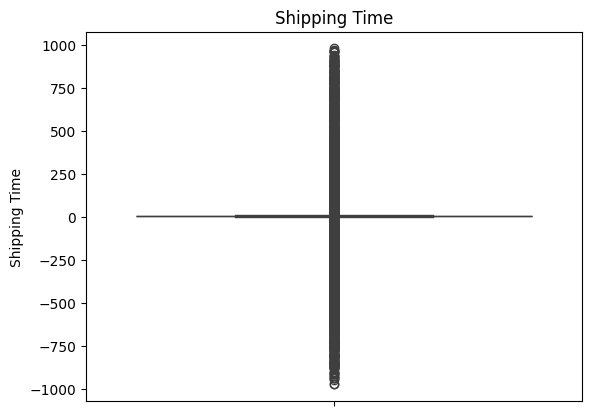

In [87]:
#Drawing a boxplot of Unit Price
sns.boxplot(y='Shipping Time', data=order)
plt.title('Shipping Time')

The Shipping column has some negative values. Thís is due to the error in recording since the Shipment Date < Order Date. There are also unusually large values. Normally, in the United States, standard shipping within the same country might take anywhere from 2 to 7 business days. International standard shipping can take longer, often ranging from 1 to 4 weeks. I decided to take this information as a reference and drop the shipping time values that < 0 and > 28

In [88]:
#drop the abnormal Shipping Time
order = order[(order['Shipping Time'] >= 0) & (order['Shipping Time'] <= 28)]
order

,Order ID,Order YearMonth,Order Year,Order Month,Order Day,Order Quantity,Product Department,Product Category,Product Name,Customer ID,...,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Shipment YearMonth,Shipping Time,Delay Shipment
0,3535,201502,2015,2,21,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,7840,...,Standard Class,4,400.0,0.25,200.0,2015/02/21,2015-02-27,2015-2,6,Late
1,4133,201503,2015,3,2,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,1203,...,Standard Class,4,400.0,0.09,200.0,2015/03/02,2015-03-06,2015-3,4,On time
2,7396,201504,2015,4,18,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,10866,...,Standard Class,4,400.0,0.06,200.0,2015/04/18,2015-04-20,2015-4,2,On time
3,11026,201506,2015,6,10,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,...,Standard Class,4,400.0,0.15,200.0,2015/06/10,2015-06-12,2015-6,2,On time
4,11026,201506,2015,6,10,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,...,Standard Class,4,400.0,0.13,200.0,2015/06/10,2015-06-12,2015-6,2,On time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,73246,201712,2017,12,5,1,Fan Shop,Toys,Toys,16799,...,Standard Class,4,12.0,0.06,6.0,2017/12/05,2017-12-11,2017-12,6,Late
30867,7908,201504,2015,4,26,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,11950,...,Standard Class,4,30.0,0.12,68.0,2015/04/26,2015-04-30,2015-4,4,On time
30868,29326,201603,2016,3,4,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,8161,...,Second Class,2,30.0,0.09,68.0,2016/03/04,2016-03-06,2016-3,2,On time
30869,63308,201707,2017,7,13,1,Fan Shop,Hunting & Shooting,insta-bed Neverflat Air Mattress,5733,...,Second Class,2,150.0,0.02,60.0,2017/07/13,2017-07-17,2017-7,4,Late


Create business performance feature

In [89]:
#Create net sales and unit price feature
order['Net Sales'] = order['Gross Sales'] - order['Gross Sales'] * order['Discount %']
order['Unit Price'] = order['Gross Sales'] / order['Order Quantity']
order

/tmp/ipython-input-1117582661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order['Net Sales'] = order['Gross Sales'] - order['Gross Sales'] * order['Discount %']
/tmp/ipython-input-1117582661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order['Unit Price'] = order['Gross Sales'] / order['Order Quantity']


,Order ID,Order YearMonth,Order Year,Order Month,Order Day,Order Quantity,Product Department,Product Category,Product Name,Customer ID,...,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Shipment YearMonth,Shipping Time,Delay Shipment,Net Sales,Unit Price
0,3535,201502,2015,2,21,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,7840,...,400.0,0.25,200.0,2015/02/21,2015-02-27,2015-2,6,Late,300.00,400.0
1,4133,201503,2015,3,2,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,1203,...,400.0,0.09,200.0,2015/03/02,2015-03-06,2015-3,4,On time,364.00,400.0
2,7396,201504,2015,4,18,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,10866,...,400.0,0.06,200.0,2015/04/18,2015-04-20,2015-4,2,On time,376.00,400.0
3,11026,201506,2015,6,10,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,...,400.0,0.15,200.0,2015/06/10,2015-06-12,2015-6,2,On time,340.00,400.0
4,11026,201506,2015,6,10,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,...,400.0,0.13,200.0,2015/06/10,2015-06-12,2015-6,2,On time,348.00,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,73246,201712,2017,12,5,1,Fan Shop,Toys,Toys,16799,...,12.0,0.06,6.0,2017/12/05,2017-12-11,2017-12,6,Late,11.28,12.0
30867,7908,201504,2015,4,26,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,11950,...,30.0,0.12,68.0,2015/04/26,2015-04-30,2015-4,4,On time,26.40,30.0
30868,29326,201603,2016,3,4,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,8161,...,30.0,0.09,68.0,2016/03/04,2016-03-06,2016-3,2,On time,27.30,30.0
30869,63308,201707,2017,7,13,1,Fan Shop,Hunting & Shooting,insta-bed Neverflat Air Mattress,5733,...,150.0,0.02,60.0,2017/07/13,2017-07-17,2017-7,4,Late,147.00,150.0


In [90]:
#Create storage cost feature
inventory = inventory_merge
inventory['Storage Cost'] = inventory['Inventory Cost Per Unit']*inventory['Warehouse Inventory']
inventory

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department,Storage Cost
0,Perfect Fitness Perfect Rip Deck,2017/12,0,0.69517,Cleats,Apparel,0.00000
1,Nike Men's Dri-FIT Victory Golf Polo,2017/12,2,1.29291,Women's Apparel,Golf,2.58582
2,O'Brien Men's Neoprene Life Vest,2017/12,0,0.56531,Indoor/Outdoor Games,Fan Shop,0.00000
3,Nike Men's Free 5.0+ Running Shoe,2017/12,1,1.26321,Cardio Equipment,Footwear,1.26321
4,Under Armour Girls' Toddler Spine Surge Runni,2017/12,0,1.47648,Shop By Sport,Golf,0.00000
...,...,...,...,...,...,...,...
4195,TaylorMade 2017 Purelite Stand Bag,2015/01,0,1.44662,Golf Gloves,Outdoors,0.00000
4196,Ogio Race Golf Shoes,2015/01,0,0.10310,Golf Bags & Carts,Outdoors,0.00000
4197,GolfBuddy VT3 GPS Watch,2015/01,0,1.77747,Kids' Golf Clubs,Outdoors,0.00000
4198,Titleist Small Wheeled Travel Cover,2015/01,0,0.15244,Golf Gloves,Outdoors,0.00000


## IV) EXPLORATORY DATA ANALYSIS

In the EDA, I focus on analyzing the characteristics, behaviors, pattern and trends based on these criterions: **Business Performance; Customer; Product; Inventory; Shipment**

### **Business Performance**

In [91]:
#overall descriptive analysis of the business sales' key metrics
order[['Order Quantity','Unit Price','Gross Sales','Net Sales','Discount %','Profit']].describe()

,Order Quantity,Unit Price,Gross Sales,Net Sales,Discount %,Profit
count,25861.000000,25861.000000,25861.000000,25861.000000,25861.000000,25861.000000
mean,2.097135,139.907506,198.150884,178.030088,0.101419,126.304513
std,1.451910,122.281886,111.770964,101.533400,0.070553,50.656121
min,1.000000,10.000000,10.000000,8.250000,0.000000,6.000000
25%,1.000000,50.000000,120.000000,105.600000,0.040000,97.000000
50%,1.000000,65.000000,200.000000,164.000000,0.090000,125.000000
75%,3.000000,200.000000,300.000000,245.000000,0.160000,147.000000
max,5.000000,533.000000,533.000000,533.000000,0.250000,258.000000


The Unit Price has mean of about 136 but the maximum value is up to five times at 533. So we should check for the outliner of the Unit Price column

Text(0.5, 1.0, 'Unit Price')

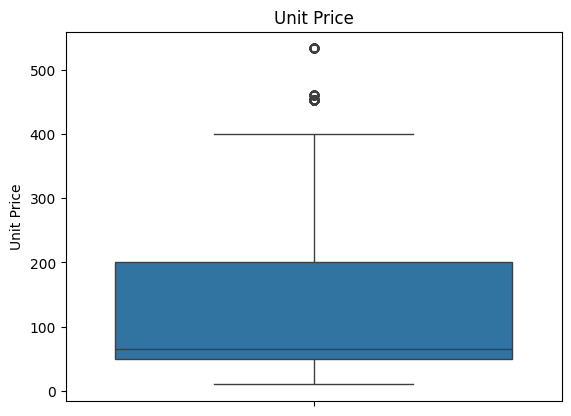

In [92]:
#Drawing a boxplot of Unit Price
sns.boxplot(y='Unit Price', data=order)
plt.title('Unit Price')

It definitely has the outliners, let's check them

In [93]:
#Show the recording of the outliners
order[order['Unit Price'] > 400]

,Order ID,Order YearMonth,Order Year,Order Month,Order Day,Order Quantity,Product Department,Product Category,Product Name,Customer ID,...,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Shipment YearMonth,Shipping Time,Delay Shipment,Net Sales,Unit Price
9387,71926,201711,2017,11,15,1,Outdoors,Garden,Lawn mower,15479,...,533.0,0.06,258.0,2017/11/15,2017-11-17,2017-11,2,On time,501.02,533.0
14936,69546,201710,2017,10,11,1,Technology,Cameras,Web Camera,13099,...,452.0,0.17,219.0,2017/10/11,2017-10-14,2017-10,3,On time,375.16,452.0
14937,69656,201710,2017,10,12,1,Technology,Cameras,Web Camera,13209,...,452.0,0.15,219.0,2017/10/12,2017-10-14,2017-10,2,On time,384.20,452.0
14938,69665,201710,2017,10,13,1,Technology,Cameras,Web Camera,13218,...,452.0,0.03,219.0,2017/10/13,2017-10-15,2017-10,2,Late,438.44,452.0
14939,69823,201710,2017,10,14,1,Technology,Cameras,Web Camera,13376,...,452.0,0.07,219.0,2017/10/14,2017-10-16,2017-10,2,On time,420.36,452.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28877,75091,201712,2017,12,9,1,Outdoors,Garden,Lawn mower,18644,...,533.0,0.03,258.0,2017/12/09,2017-12-13,2017-12,4,Late,517.01,533.0
28910,71801,201711,2017,11,11,1,Outdoors,Garden,Lawn mower,15354,...,533.0,0.05,258.0,2017/11/11,2017-11-13,2017-11,2,Late,506.35,533.0
28911,71978,201711,2017,11,11,1,Outdoors,Garden,Lawn mower,15531,...,533.0,0.09,258.0,2017/11/11,2017-11-16,2017-11,5,Late,485.03,533.0
28912,71985,201711,2017,11,13,1,Outdoors,Garden,Lawn mower,15538,...,533.0,0.01,258.0,2017/11/13,2017-11-18,2017-11,5,Late,527.67,533.0


After carefully reviewing the business's operation and product characteristics, I have decided not to exclude these outliners. The majority of outliners are electronic items so it's their nature to have a high price tag

_What are the total net sales, profit and profit margin by the company?_

In [94]:
# Calculate Total Net Sales, Total Profit, and Profit Margin
total_net_sales = order['Net Sales'].sum()
total_profit = order['Profit'].sum()
profit_margin = (total_profit / total_net_sales) * 100

print("Total Net Sales:", total_net_sales)
print("Total Profit:", total_profit)
print("Profit Margin:", profit_margin, "%")

Total Net Sales: 4604036.11
Total Profit: 3266361.0
Profit Margin: 70.94559907784911 %


**Take away:** The company has had an impressive business performance over the past 3 years with net sales of about 5.5 millions and profit of nearly 4 millions. As a result, the company has a very good profit margin, up to 72%

Since we only record profit when the goods are delivered to the customer, I will chose the shipment date for further calculation related to sales and profit

_What are the average net sales and profit per month?_

In [95]:
average_net_sales = total_net_sales/37
average_profit = total_profit/37

print("Average Net Sales:", average_net_sales)
print("Average Profit:", average_profit)

Average Net Sales: 124433.40837837839
Average Profit: 88280.02702702703


The company has average net sales of 150k and profit of about 108k per month

_How do the net sales and profit change over time?_

/tmp/ipython-input-2559458098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order['Shipment YearMonth'] = pd.to_datetime(order['Shipment YearMonth'], format='%Y-%m')
/tmp/ipython-input-2559458098.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Axes: xlabel='Shipment YearMonth', ylabel='Profit Margin'>

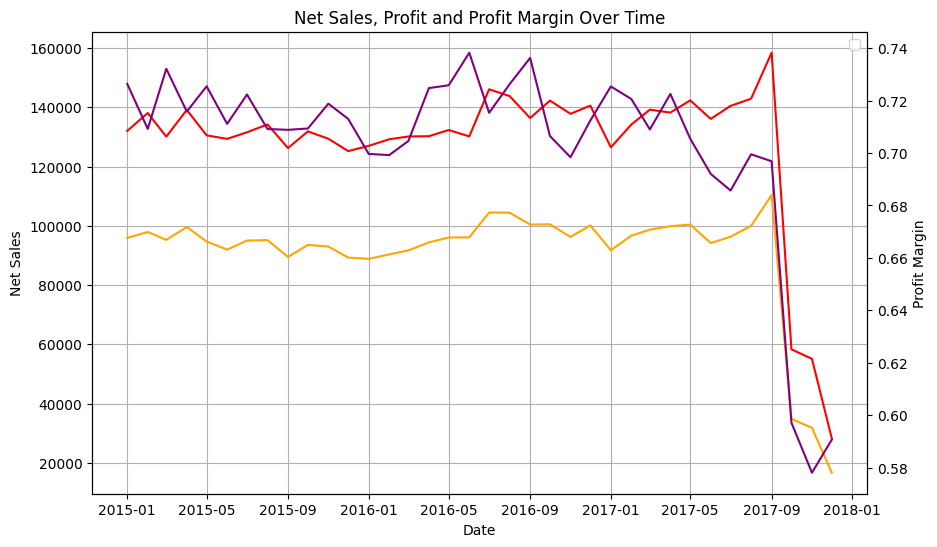

In [96]:
order['Shipment YearMonth'] = pd.to_datetime(order['Shipment YearMonth'], format='%Y-%m')

# Group data by year and month, and calculate the metrics
sales = order.groupby(['Shipment YearMonth']).agg({'Net Sales':'sum',
                                                'Profit':'sum'})
sales['Profit_margin'] = sales['Profit'] / sales['Net Sales']

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.lineplot(x='Shipment YearMonth',y='Net Sales', data = sales, color='red')
sns.lineplot(x='Shipment YearMonth',y='Profit', data = sales, color='orange')
plt.xlabel('Date')
plt.title('Net Sales, Profit and Profit Margin Over Time')
plt.legend()
plt.grid(True)

# Create a secondary y-axis
ax2 = plt.gca().twinx()
ax2.set_ylabel('Profit Margin')
sns.lineplot(x='Shipment YearMonth', y='Profit_margin', data=sales, color='purple', ax=ax2)

The company's overall business performance reveals a period of stagnant net sales and profit, followed by a sharp decline in Q4/2017.
Particularly, Net sales went sideway for a long time before plummeting by 70% in Q4/2017. The same trend also happen with Profit during that period.
Although the Profit Margin has decresed by 30% but it was still a pretty good profit margin of nearly 60%

_How do the number of orders change over time?_

/tmp/ipython-input-1528464093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order['Order YearMonth'] = pd.to_datetime(order['Order YearMonth'], format='%Y%m')
/tmp/ipython-input-1528464093.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


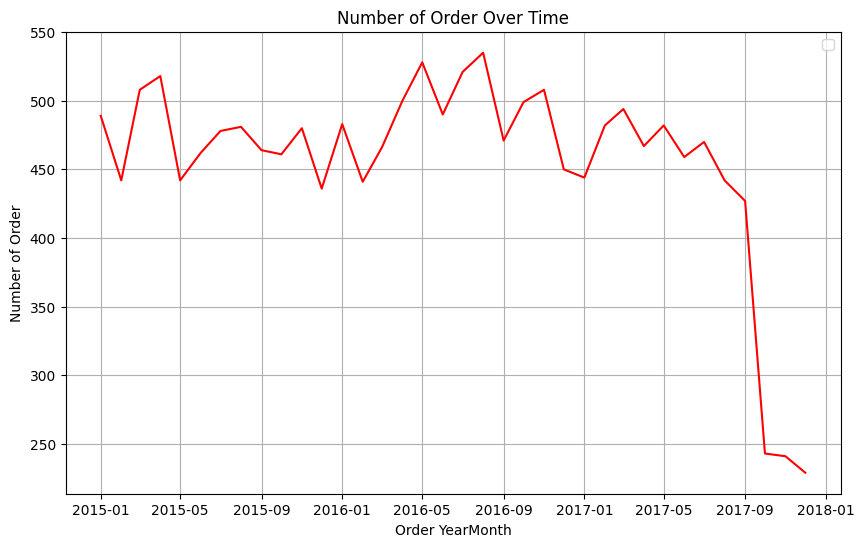

In [97]:
order['Order YearMonth'] = pd.to_datetime(order['Order YearMonth'], format='%Y%m')

# Group data by year and month, and calculate the metrics
demand = order.groupby(['Order YearMonth'])['Order ID'].nunique().reset_index()
datetime# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.lineplot(x='Order YearMonth', y='Order ID', data=demand, color='red')
plt.ylabel('Number of Order')
plt.title('Number of Order Over Time')
plt.legend()
plt.grid(True)

The number of orders also witnessed a sharp decline of about 85% in Q4/2017

**Take away:** The number of order decrease significantly leading to the sharp decline in net sales and profit. In addition, both net sales and profits decline at the same time by the relative same amount, indicating that costs are unlikely to change and the company is actually facing serious problems from the revenue side

_How do the average order quantity and average unit price change over time?_

/tmp/ipython-input-1705064209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order['Order YearMonth'] = pd.to_datetime(order['Order YearMonth'], format='%Y/%m')
/tmp/ipython-input-1705064209.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Axes: xlabel='Order YearMonth', ylabel='Unit Price'>

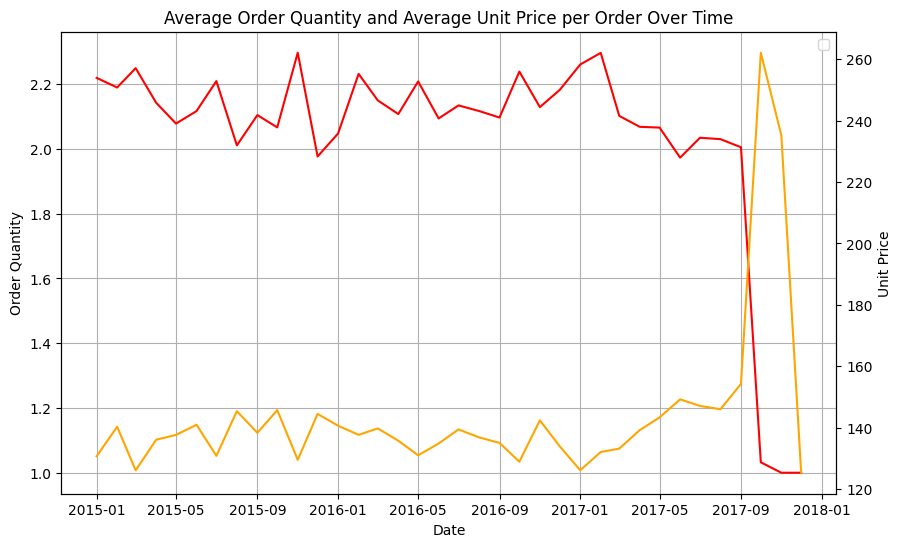

In [98]:
order['Order YearMonth'] = pd.to_datetime(order['Order YearMonth'], format='%Y/%m')

# Group data by year and month, and calculate the metrics
demand = order.groupby(['Order YearMonth']).agg({'Order Quantity':'mean',
                                                'Unit Price':'mean'})

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.lineplot(x='Order YearMonth',y='Order Quantity', data = demand, color='red')
plt.xlabel('Date')
plt.title('Average Order Quantity and Average Unit Price per Order Over Time')
plt.legend()
plt.grid(True)

# Create a secondary y-axis
ax2 = plt.gca().twinx()
ax2.set_ylabel('Unit Price')
sns.lineplot(x='Order YearMonth',y='Unit Price', data = demand, color='orange')

It is more interesting when we look at average order quantity and average unit price per order over time, the two main factors that contribute to the average value of an order. While the average order quantity decreased, the average unit price rebounded strongly in 10/2017 (nearly doubled) but then also dropped sharply.

_Which product departments account for the majority of net sales and number of orders?_

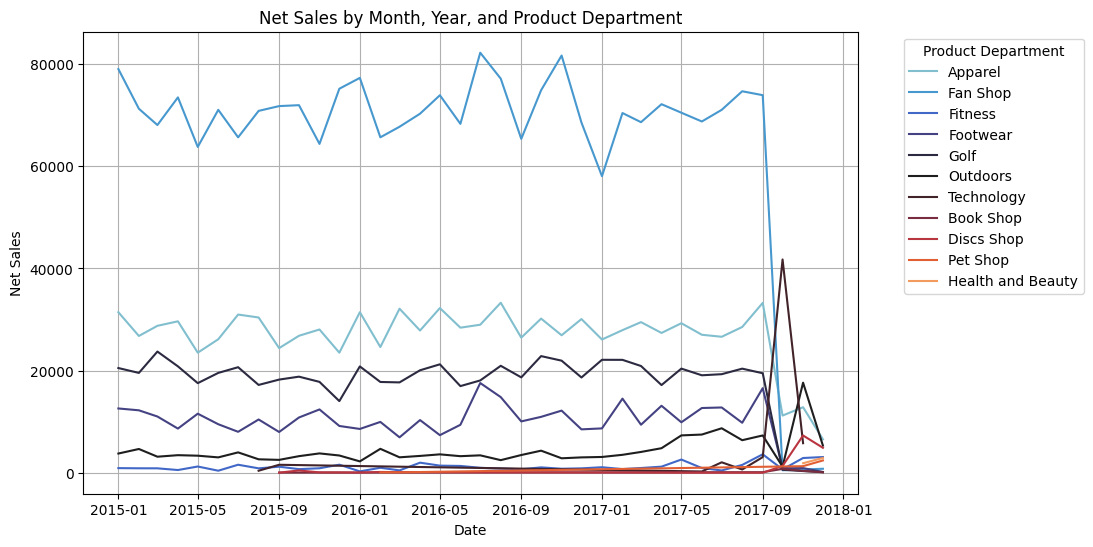

In [99]:
# Group data by year and month, and calculate the metrics
product_sales = order.groupby(['Order YearMonth','Product Department'])['Net Sales'].sum().reset_index()

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.lineplot(x='Order YearMonth',y = 'Net Sales', data = product_sales, hue='Product Department', palette='icefire')

plt.xlabel('Date')
plt.title('Net Sales by Month, Year, and Product Department')
plt.legend(title = 'Product Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

Apparel, Fanshop, Footwear and Golf are the product departments that contributed the most to the net sales. However, in Q4/2017, revenue from these product departments has suddenly plummeted and almost disappeared. Meanwhile, the product departments such as Technology and Discs Shop showed potential growth with increasing net sales

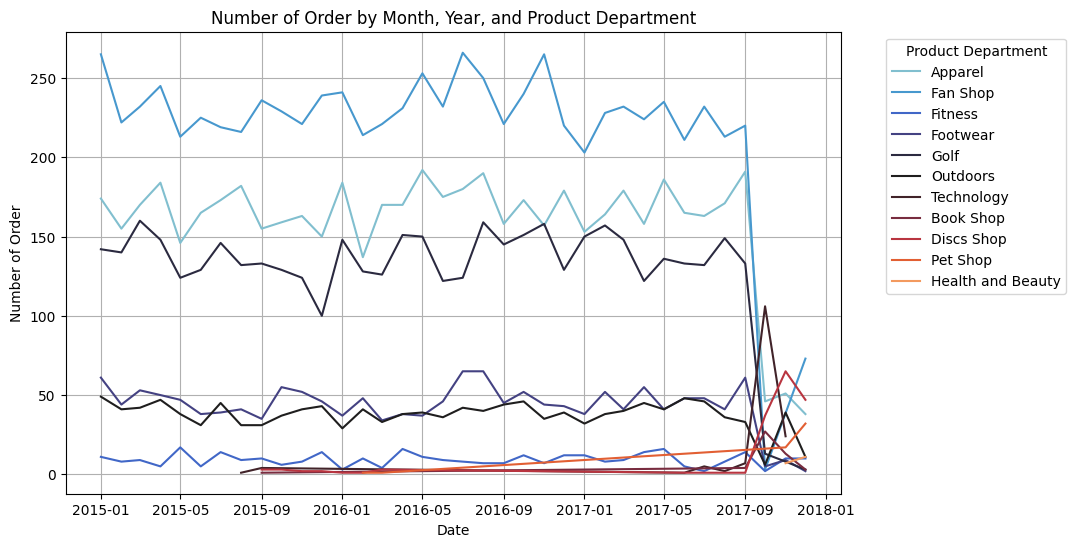

In [100]:
# Group data by year and month, and calculate the metrics
product_sales = order.groupby(['Order YearMonth','Product Department'])['Order ID'].nunique().reset_index()
product_sales['Number of Order'] = product_sales['Order ID']
# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.lineplot(x='Order YearMonth',y = 'Number of Order', data = product_sales, hue='Product Department', palette='icefire')
plt.xlabel('Date')
plt.title('Number of Order by Month, Year, and Product Department')
plt.legend(title = 'Product Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

The same trend also occurs when we count the number of orders for each product department over time

**Take away:** Looking deeper into the product department, we can better gain insights into the decline of the business activities. The absence of the old leading - best selling items (Apparel, Fanshop, Footwear, Golf), which had been instrumental to the company’s success, was closely linked to this downturn.

### **Customer**

_How was the distribution of customers by country and market?_

/tmp/ipython-input-403859352.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_10, x= 'Customer Country', y='Number of Customer', palette= 'icefire')


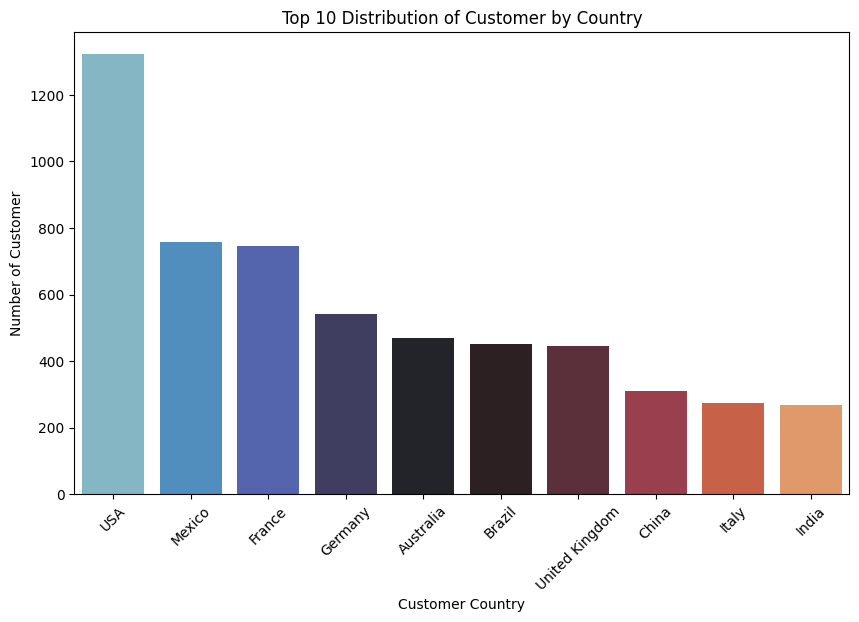

In [101]:
# Group data by year and month, and calculate the metrics
customer = order.groupby(['Customer Country'])['Customer ID'].nunique().reset_index()
customer['Number of Customer'] = customer['Customer ID']  # Corrected line
customer = customer.sort_values(by='Number of Customer',ascending=False).reset_index(drop=True)
top_10 = customer[['Customer Country','Number of Customer']].head(10)

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.barplot(data = top_10, x= 'Customer Country', y='Number of Customer', palette= 'icefire')
plt.title('Top 10 Distribution of Customer by Country')
plt.xticks(rotation = 45)
plt.show()

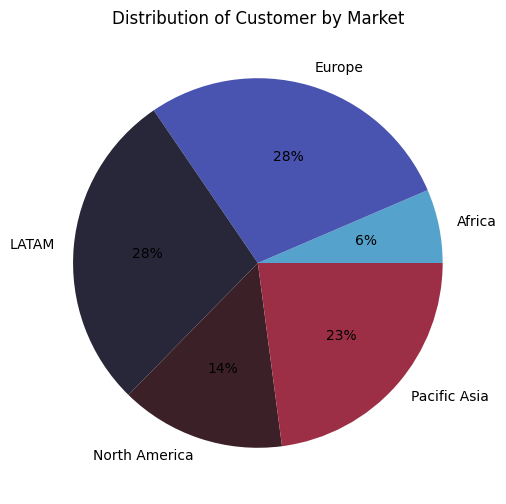

In [102]:
# Group data by year and month, and calculate the metrics
customer = order.groupby(['Customer Market'])['Customer ID'].nunique().reset_index()
customer['Number of Customer'] = customer['Customer ID']

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
data = customer['Number of Customer']
labels = customer['Customer Market']

#define Seaborn color palette to use
colors = sns.color_palette('icefire')

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Distribution of Customer by Market')

plt.show()

The majority of customers come from LATAM, North America, Western Europe and Asia Pacific region. In which, customers from USA are much higher than other countries

*How many customers does the company have over time?*

/tmp/ipython-input-2408356339.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Order YearMonth',y = 'Number of Customer', data = customer, color ='red', ci=None)
/tmp/ipython-input-2408356339.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


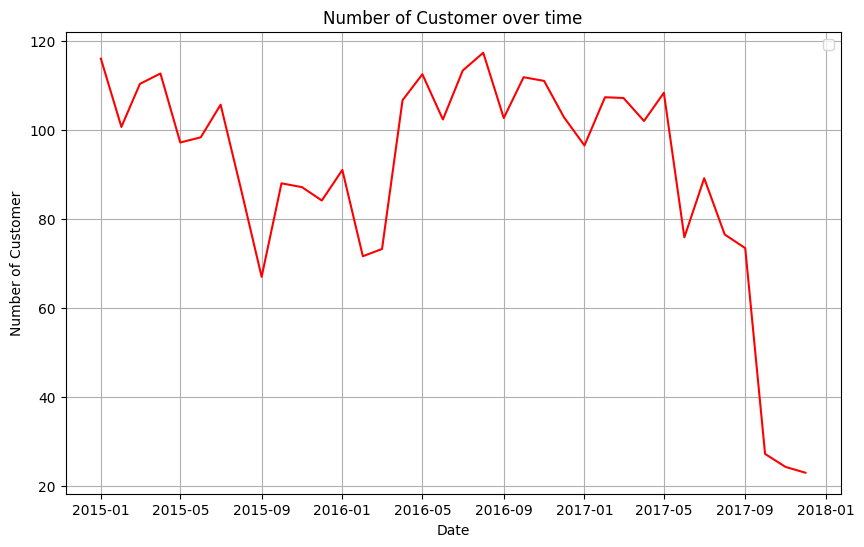

In [103]:
# Group data by year and month, and calculate the metrics
customer = order.groupby(['Order YearMonth','Product Department'])['Customer ID'].nunique().reset_index()
customer['Number of Customer'] = customer['Customer ID']
# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.lineplot(x='Order YearMonth',y = 'Number of Customer', data = customer, color ='red', ci=None)
plt.xlabel('Date')
plt.title('Number of Customer over time')
plt.legend()
plt.grid(True)

plt.show()

The number of customers per month ranges around 100 to 140. However, this number has decreased to below 100 between the end of 2015 and the beginning of 2016. Besides, a sharp decrease in the fourth quarter of 2017 confirmed for a drop in number of orders and a serious problem from the revenue side

_Are there any patterns or trends of buying behavior over time?_

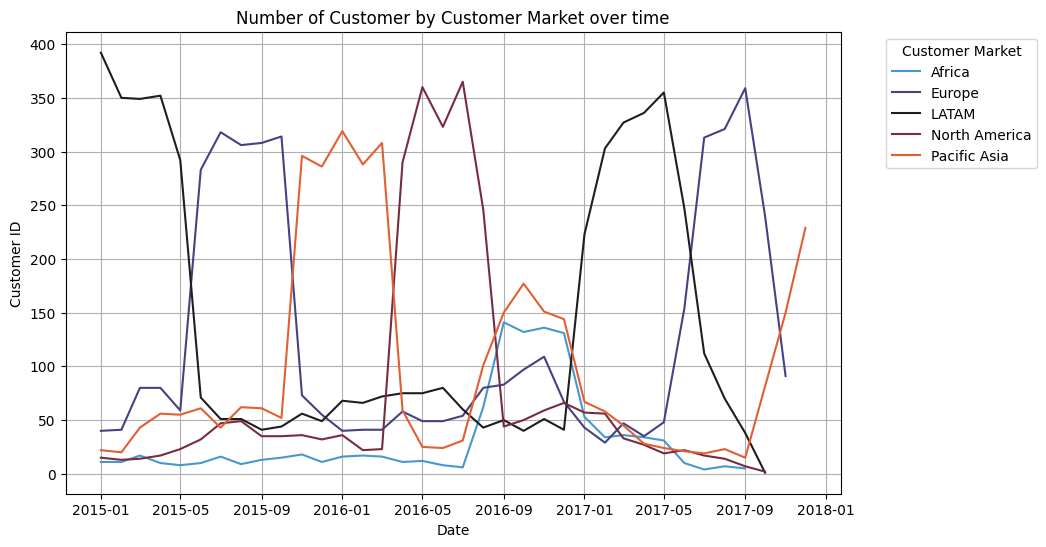

In [104]:
# Group data by year and month, and calculate the metrics
customer = order.groupby(['Order YearMonth','Customer Market'])['Customer ID'].nunique().reset_index()

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.lineplot(x='Order YearMonth',y = 'Customer ID', data = customer, hue='Customer Market', palette='icefire')

plt.xlabel('Date')
plt.title('Number of Customer by Customer Market over time')
plt.legend(title = 'Customer Market', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

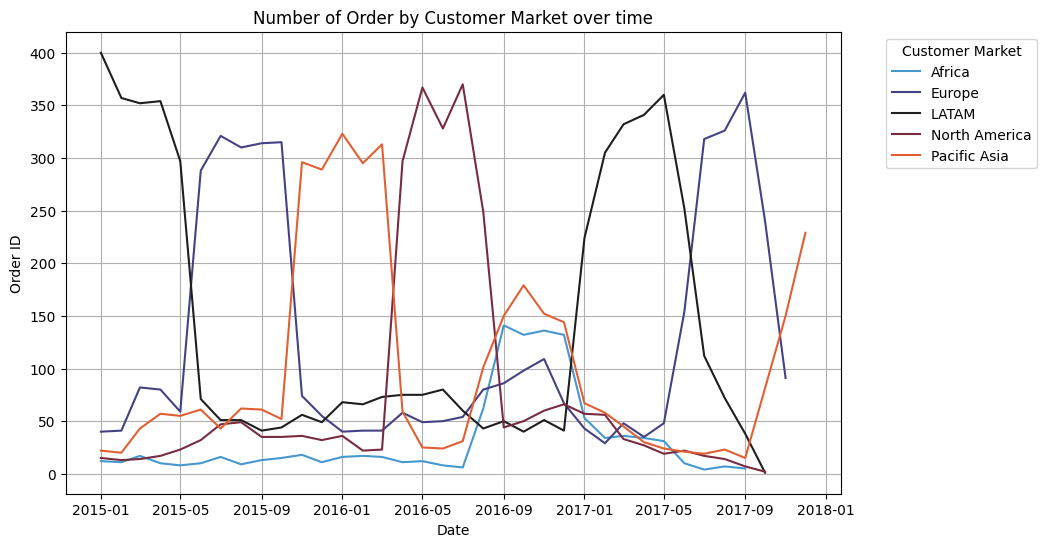

In [105]:
# Group data by year and month, and calculate the metrics
customer = order.groupby(['Order YearMonth','Customer Market'])['Order ID'].nunique().reset_index()

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.lineplot(x='Order YearMonth',y = 'Order ID', data = customer, hue='Customer Market', palette='icefire')

plt.xlabel('Date')
plt.title('Number of Order by Customer Market over time')
plt.legend(title = 'Customer Market', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

As you can see, there is a certain trend in the buying behavior of customers from different continents. Over time, the tendency to buy more often occurs in the LATAM, then in turn to Europe, Pacific Asia, North America and Africa. This trend continues to repeat from the LATAM

/tmp/ipython-input-2117563446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order['Order Month'] = order['Order Month'].astype(int)
/tmp/ipython-input-2117563446.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = customer, x= 'Order Month', y='Order ID', palette= 'icefire')


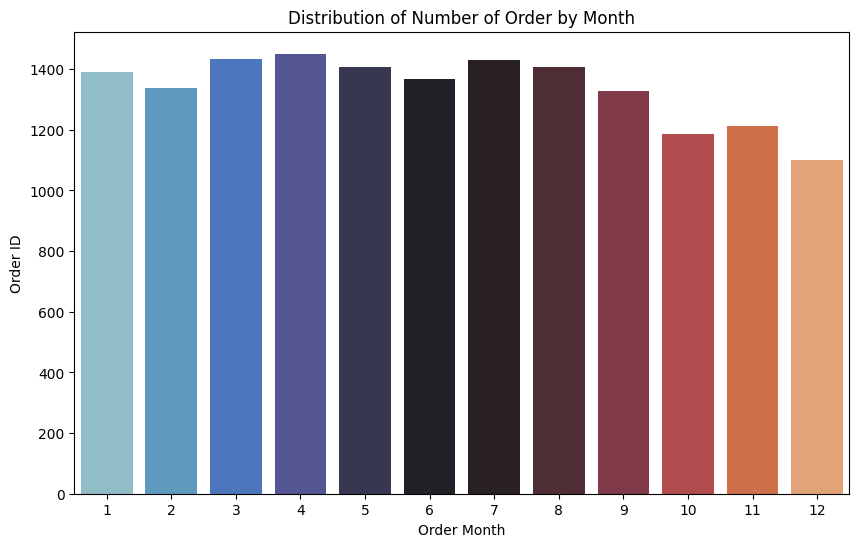

In [106]:
# Group data by year and month, and calculate the metrics
order['Order Month'] = order['Order Month'].astype(int)
customer = order.groupby(['Order Month'])['Order ID'].nunique().reset_index()
customer = customer.sort_values(by='Order Month', ascending = False)
# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.barplot(data = customer, x= 'Order Month', y='Order ID', palette= 'icefire')
plt.title('Distribution of Number of Order by Month')
plt.show()


/tmp/ipython-input-2629820933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order['Order Day'] = order['Order Day'].astype(int)
/tmp/ipython-input-2629820933.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = customer, x= 'Order Day', y='Order ID', palette= 'icefire')


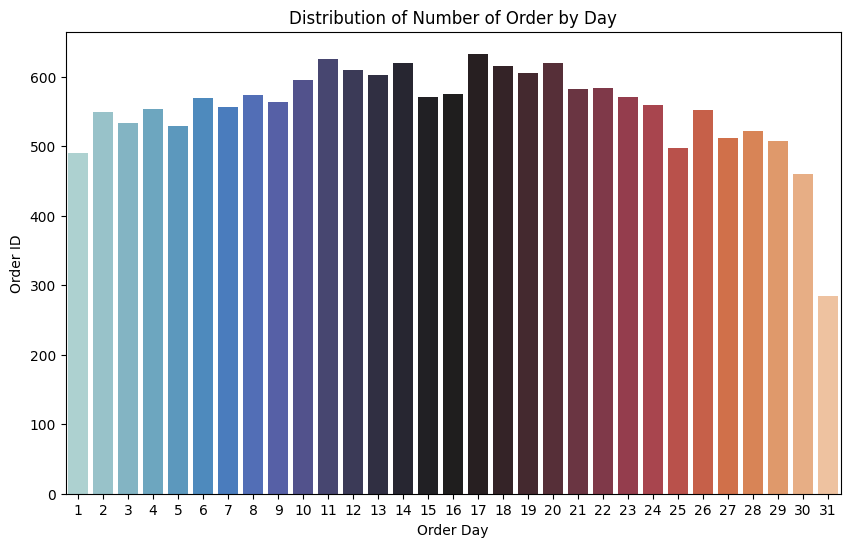

In [107]:
# Group data by year and month, and calculate the metrics
order['Order Day'] = order['Order Day'].astype(int)
customer = order.groupby(['Order Day'])['Order ID'].nunique().reset_index()
customer = customer.sort_values(by='Order Day', ascending = False)
# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.barplot(data = customer, x= 'Order Day', y='Order ID', palette= 'icefire')
plt.title('Distribution of Number of Order by Day')
plt.show()


The number of orders by month does not has any significant difference.
In terms of days, customers usually order more in the middle of the month


**Take away:** Although over time, the buying haviour from key customer market has changed significantly, but the demand for ordering does not seem to have a strong fluctuation

### **Product**

_Which product categories and product names are most preferred?_

/tmp/ipython-input-1445644648.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prefer, x='Product Category', y='Order ID', palette='icefire')


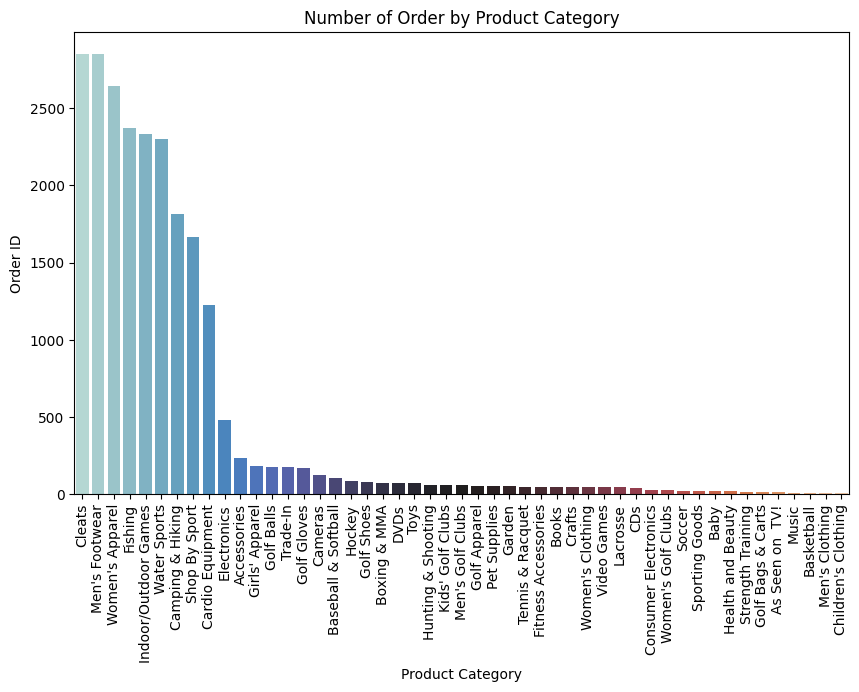

In [108]:
# Group data by Order YearMonth and Product Department, and calculate the metrics
prefer = order.groupby(['Product Category'])['Order ID'].nunique().reset_index()
prefer = prefer.sort_values(by='Order ID',ascending=False)
# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.barplot(data=prefer, x='Product Category', y='Order ID', palette='icefire')
plt.title('Number of Order by Product Category')
plt.xticks(rotation = 90)
plt.show()

Cleats, Fishing, Camping & Hiking, Water Sports, Indoor/Outdoor Games, Women’s Apparel, Men’s Footwear, Shop by Sports and Cardio Equipment are the top 9 product categories with outstanding number of orders, completely overwhelm other categories. For less popular categories, Electronics outperforms the others

In [109]:
# Group data by Order YearMonth and Product Department, and calculate the metrics
prefer = order.groupby(['Product Name'])['Order ID'].nunique().reset_index()
prefer = prefer.sort_values(by='Order ID',ascending=False)
#Top 10 Product name by the number of orders
prefer.head(10)

,Product Name,Order ID
53,Nike Men's CJ Elite 2 TD Football Cleat,2851
68,Perfect Fitness Perfect Rip Deck,2847
56,Nike Men's Dri-FIT Victory Golf Polo,2642
21,Field & Stream Sportsman 16 Gun Fire Safe,2372
64,O'Brien Men's Neoprene Life Vest,2336
67,Pelican Sunstream 100 Kayak,2297
18,Diamondback Women's Serene Classic Comfort Bi,1817
97,Under Armour Girls' Toddler Spine Surge Runni,1611
58,Nike Men's Free 5.0+ Running Shoe,1173
105,Web Camera,121


It can be seen that the gap between the top 9 product names in the lead and the product names behind is very large. Product name ranked 10th with only 179 orders while Product name ranked 9th had 1720 orders, nearly as 10 times.

_Which product categories and product names are most profitable?_

/tmp/ipython-input-429582238.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prefer, x='Product Category', y='Profit', palette='icefire')


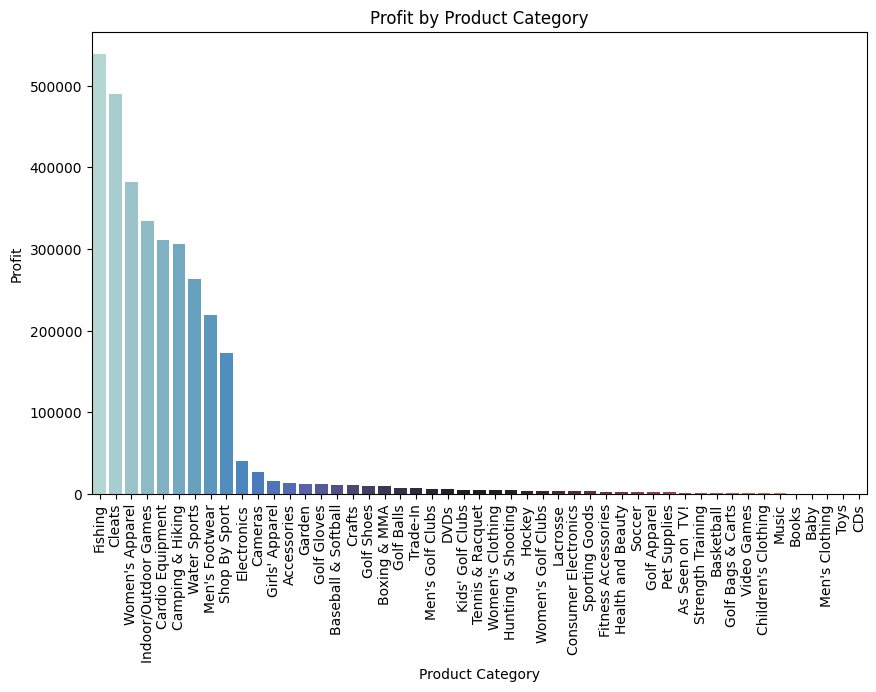

In [110]:
# Group data by Order YearMonth and Product Department, and calculate the metrics
prefer = order.groupby(['Product Category'])['Profit'].sum().reset_index()
prefer = prefer.sort_values(by='Profit',ascending=False)
# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.barplot(data=prefer, x='Product Category', y='Profit', palette='icefire')
plt.title('Profit by Product Category')
plt.xticks(rotation = 90)
plt.show()

In [111]:
# Group data by Order YearMonth and Product Department, and calculate the metrics
prefer = order.groupby(['Product Name'])['Profit'].sum().reset_index()
prefer = prefer.sort_values(by='Profit',ascending=False)

#Top 10 profitable product names
prefer.head(10)

,Product Name,Profit
21,Field & Stream Sportsman 16 Gun Fire Safe,538800.0
68,Perfect Fitness Perfect Rip Deck,489216.0
56,Nike Men's Dri-FIT Victory Golf Polo,382250.0
64,O'Brien Men's Neoprene Life Vest,333875.0
58,Nike Men's Free 5.0+ Running Shoe,307720.0
18,Diamondback Women's Serene Classic Comfort Bi,306600.0
67,Pelican Sunstream 100 Kayak,261700.0
53,Nike Men's CJ Elite 2 TD Football Cleat,218920.0
97,Under Armour Girls' Toddler Spine Surge Runni,168295.0
105,Web Camera,26499.0


It's no wonder that the best selling products are the most profitable

### **Inventory**

In [112]:
inventory

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department,Storage Cost
0,Perfect Fitness Perfect Rip Deck,2017/12,0,0.69517,Cleats,Apparel,0.00000
1,Nike Men's Dri-FIT Victory Golf Polo,2017/12,2,1.29291,Women's Apparel,Golf,2.58582
2,O'Brien Men's Neoprene Life Vest,2017/12,0,0.56531,Indoor/Outdoor Games,Fan Shop,0.00000
3,Nike Men's Free 5.0+ Running Shoe,2017/12,1,1.26321,Cardio Equipment,Footwear,1.26321
4,Under Armour Girls' Toddler Spine Surge Runni,2017/12,0,1.47648,Shop By Sport,Golf,0.00000
...,...,...,...,...,...,...,...
4195,TaylorMade 2017 Purelite Stand Bag,2015/01,0,1.44662,Golf Gloves,Outdoors,0.00000
4196,Ogio Race Golf Shoes,2015/01,0,0.10310,Golf Bags & Carts,Outdoors,0.00000
4197,GolfBuddy VT3 GPS Watch,2015/01,0,1.77747,Kids' Golf Clubs,Outdoors,0.00000
4198,Titleist Small Wheeled Travel Cover,2015/01,0,0.15244,Golf Gloves,Outdoors,0.00000


In [113]:
#overall descriptive analysis of the inventory management's key metrics
inventory[['Warehouse Inventory', 'Inventory Cost Per Unit', 'Storage Cost']].describe()

,Warehouse Inventory,Inventory Cost Per Unit,Storage Cost
count,4200.000000,4200.000000,4200.000000
mean,16.908095,1.236450,20.578791
std,71.121721,0.652183,100.453162
min,0.000000,0.102360,0.000000
25%,0.000000,0.672187,0.000000
50%,0.000000,1.262455,0.000000
75%,4.000000,1.800760,4.365012
max,931.000000,2.345030,1890.973240


Warehouse Inventory was spread widely with a high standard deviation of 71 while the average value is only about 16. Additionally, the 25th and 50th percentile values are both zero. The max value is 931 while the 75th percentile is just 4. There are definitely outliners

Text(0.5, 1.0, 'Warehouse Inventory')

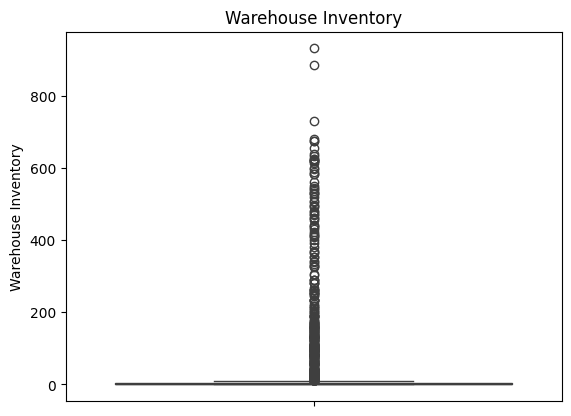

In [114]:
#Drawing a boxplot of Warehouse Inventory
sns.boxplot(y='Warehouse Inventory', data=inventory)
plt.title('Warehouse Inventory')

In [115]:
inventory[inventory['Warehouse Inventory']>10]

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department,Storage Cost
56,Dell Laptop,2017/12,14,1.56369,None,None,21.89166
59,DVDs,2017/12,64,2.03553,DVDs,Discs Shop,130.27392
62,Summer dresses,2017/12,13,1.36250,Women's Clothing,Apparel,17.71250
65,Rock music,2017/12,16,2.26272,Music,Discs Shop,36.20352
68,Toys,2017/12,133,0.19512,Toys,Fan Shop,25.95096
...,...,...,...,...,...,...,...
4148,Glove It Women's Mod Oval 3-Zip Carry All Gol,2015/01,14,0.34936,Trade-In,Outdoors,4.89104
4150,Under Armour Women's Ignite Slide,2015/01,18,2.23827,Electronics,Footwear,40.28886
4155,Nike Women's Tempo Shorts,2015/01,43,2.30847,Cardio Equipment,Footwear,99.26421
4159,Hirzl Women's Hybrid Golf Glove,2015/01,13,1.34994,Golf Balls,Outdoors,17.54922


There are many product names with no inventory, while some product names have a very large inventory. Thus, the company only focuses on importing and selling the best selling product names. I have decided not to drop the outliners

_Which product departments account for the majority of warehouse inventory and
storage cost?_

/tmp/ipython-input-717993477.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ware, x='Product Department', y='Warehouse Inventory', palette='icefire')


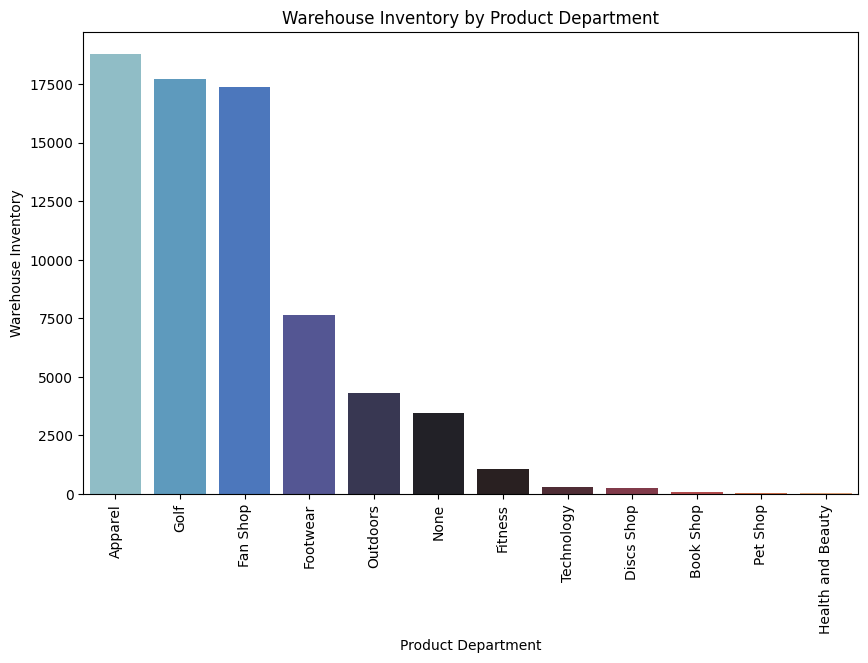

In [116]:
# Group data by Order YearMonth and Product Department, and calculate the metrics
ware = inventory.groupby(['Product Department'])['Warehouse Inventory'].sum().reset_index()
ware = ware.sort_values(by='Warehouse Inventory',ascending=False)
# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.barplot(data=ware, x='Product Department', y='Warehouse Inventory', palette='icefire')
plt.title('Warehouse Inventory by Product Department')
plt.xticks(rotation = 90)
plt.show()

/tmp/ipython-input-2707171667.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ware, x='Product Department', y='Storage Cost', palette='icefire')


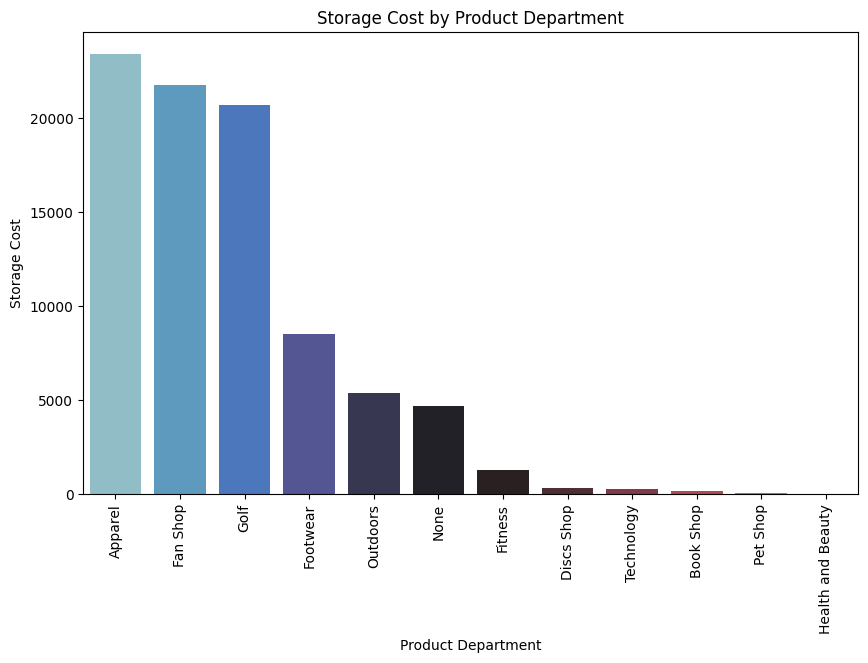

In [117]:
# Group data by Order YearMonth and Product Department, and calculate the metrics
ware = inventory.groupby(['Product Department'])['Storage Cost'].sum().reset_index()
ware = ware.sort_values(by='Storage Cost',ascending=False)
# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.barplot(data=ware, x='Product Department', y='Storage Cost', palette='icefire')
plt.title('Storage Cost by Product Department')
plt.xticks(rotation = 90)
plt.show()

The best selling product departments (Apparel, Fan Shop, Golf, Footwear) account for the most warehouse inventory and also account for the majority of storage costs.

_How was the inventory cost per unit distribute by product department?_

/tmp/ipython-input-1499188909.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ware, x='Product Department', y='Inventory Cost Per Unit', palette='icefire')


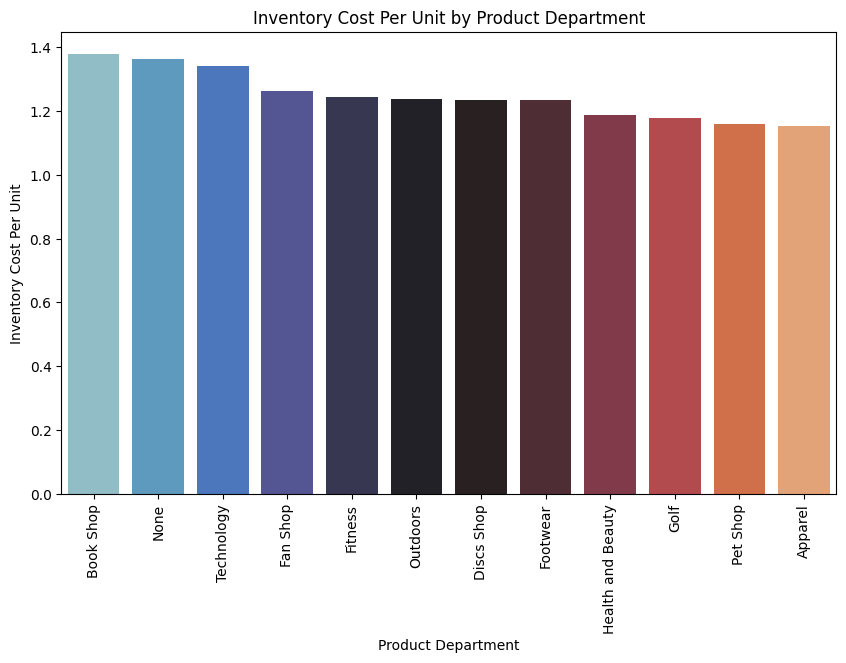

In [118]:
# Group data by Order YearMonth and Product Department, and calculate the metrics
ware = inventory.groupby(['Product Department'])['Inventory Cost Per Unit'].mean().reset_index()
ware = ware.sort_values(by='Inventory Cost Per Unit',ascending=False)
# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
sns.barplot(data=ware, x='Product Department', y='Inventory Cost Per Unit', palette='icefire')
plt.title('Inventory Cost Per Unit by Product Department')
plt.xticks(rotation = 90)
plt.show()

We can see the opposite of cost per unit. The best selling product departments have the lower average inventory costs per unit compared to the others. The only exception is the Fan Shop since it has almost the highest storage costs

_How do the warehouse inventory and storage costs change over time?_

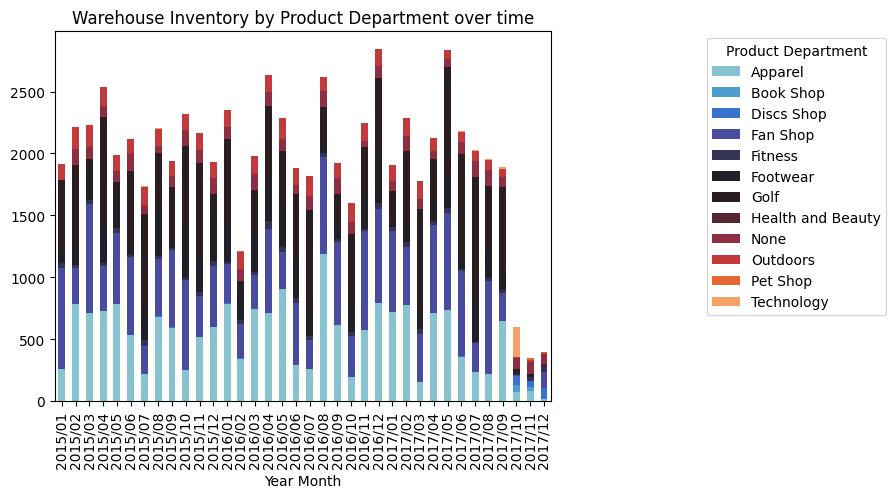

In [119]:
# Group data by Order YearMonth and Product Department, and calculate the metrics
ware = inventory.groupby(['Year Month','Product Department']).agg({'Warehouse Inventory':'sum',
                                                                   'Storage Cost':'sum'})
ware = ware.sort_values(by='Year Month', ascending=True)

# Pivot the DataFrame
invent = ware.pivot_table(index='Year Month', columns='Product Department', values='Warehouse Inventory', aggfunc='first')

#Plotting
invent.plot(kind='bar', stacked=True, title='Warehouse Inventory by Product Department over time', color = sns.color_palette('icefire', n_colors =12))
plt.legend(title = 'Product Department', bbox_to_anchor=(1.3, 1), loc='upper left')
plt.show()

The best-selling departments  (Appareal, Golf, Fanshop) always have the highest amount of inventory but were almost out of stock in Q4/2017


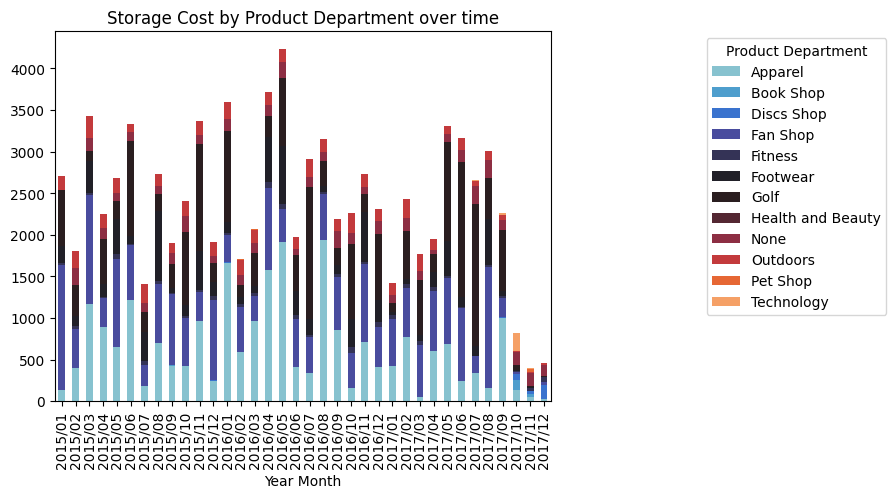

In [120]:
# Pivot the DataFrame
store = ware.pivot_table(index='Year Month', columns='Product Department', values='Storage Cost', aggfunc='first')

#Plotting
store.plot(kind='bar', stacked=True, title='Storage Cost by Product Department over time', color = sns.color_palette('icefire', n_colors =12))
plt.legend(title = 'Product Department', bbox_to_anchor=(1.3, 1), loc='upper left')
plt.show()

The best selling departments have an overwhelming share of Storage Cost. This cost has been only allocated to Technology and Pet Shop recently. Besides, the cost for product names that do not have the demand to order from customers also accounts for a significant proportion

**Take away:** Since both revenue and storage cost have dropped dramatically, there might be an incident resulting in the company being unable to continue selling those best-selling inventory. This can happen due to supply chain disruption. Also, the best selling products are always imported by the company a lot, while new products such as Technology have only been imported in a short time. Therefore, it is not excluded that the company intentionally changes its product offerings to test market demand

In [121]:
fulfillment.describe()

,Warehouse Order Fulfillment (days)
count,118.000000
mean,5.333898
std,2.414282
min,1.000000
25%,3.300000
50%,5.300000
75%,6.975000
max,9.900000


_What is the average of the average fulfillment order?_

In [122]:
avg = fulfillment['Warehouse Order Fulfillment (days)'].mean()
avg

np.float64(5.333898305084746)

_Which product names have the lowest and highest average order fulfillment ?_

In [123]:
#Top 10 product names by average fulfillment order
fulfillment = fulfillment.sort_values(by='Warehouse Order Fulfillment (days)',ascending=False)
top10 = fulfillment.head(10)
top10

,Product Name,Warehouse Order Fulfillment (days)
38,Titleist Pro V1x Golf Balls,9.9
80,Nike Kids' Grade School KD VI Basketball Shoe,9.9
66,Elevation Training Mask 2.0,9.8
13,LIJA Women's Eyelet Sleeveless Golf Polo,9.5
48,Bridgestone e6 Straight Distance NFL Tennesse,9.5
3,Nike Men's Free 5.0+ Running Shoe,9.4
95,adidas Brazuca 2017 Official Match Ball,9.3
65,Rock music,9.3
19,Columbia Men's PFG Anchor Tough T-Shirt,9.1
82,Smart watch,9.1


In [124]:
#Top 10 product names has lowest avg order fulfillment
fulfillment = fulfillment.sort_values(by='Warehouse Order Fulfillment (days)',ascending=True)
top10 = fulfillment.head(10)
top10

,Product Name,Warehouse Order Fulfillment (days)
39,adidas Men's Germany Black Crest Away Tee,1.0
112,Diamondback Girls' Clarity 24 Hybrid Bike 201,1.0
107,Total Gym 1400,1.3
92,Mio ALPHA Heart Rate Monitor/Sport Watch,1.3
88,LIJA Women's Button Golf Dress,1.4
104,Polar Loop Activity Tracker,1.4
21,Team Golf Tennessee Volunteers Putter Grip,1.7
7,Pelican Sunstream 100 Kayak,1.8
98,Nike Men's Kobe IX Elite Low Basketball Shoe,1.8
73,Nike Women's Free 5.0 TR FIT PRT 4 Training S,1.9


_What average order fulfillment of each product departments?_

In [125]:
#Merge table product and fulfillment
product_ful = pd.merge(fulfillment, product, on='Product Name')
product_ful

,Product Name,Warehouse Order Fulfillment (days),Product Category,Product Department
0,adidas Men's Germany Black Crest Away Tee,1.0,Girls' Apparel,Golf
1,Diamondback Girls' Clarity 24 Hybrid Bike 201,1.0,Basketball,Fitness
2,Total Gym 1400,1.3,Cleats,Apparel
3,Mio ALPHA Heart Rate Monitor/Sport Watch,1.3,Kids' Golf Clubs,Outdoors
4,LIJA Women's Button Golf Dress,1.4,Golf Shoes,Outdoors
...,...,...,...,...
108,LIJA Women's Eyelet Sleeveless Golf Polo,9.5,Golf Shoes,Outdoors
109,Bridgestone e6 Straight Distance NFL Tennesse,9.5,Electronics,Outdoors
110,Elevation Training Mask 2.0,9.8,Soccer,Fitness
111,Titleist Pro V1x Golf Balls,9.9,Electronics,Outdoors


In [126]:
#Top 10 product names by average fulfillment order
product_dep = product_ful.groupby(['Product Department'])['Warehouse Order Fulfillment (days)'].mean()
product_dep = product_dep.sort_values(ascending=False)
product_dep

,Warehouse Order Fulfillment (days)
Product Department,
Discs Shop,7.050000
Pet Shop,6.900000
Apparel,5.962500
Fitness,5.950000
Golf,5.562500
Outdoors,5.515385
Book Shop,5.200000
Footwear,4.876923
Technology,4.400000


**Take away:** Interestingly, the best-selling parts have the longest replenishment times, in stark contrast to lesser-known products like Technology and Health and Beauty.

### **Shipment**

In [127]:
order

,Order ID,Order YearMonth,Order Year,Order Month,Order Day,Order Quantity,Product Department,Product Category,Product Name,Customer ID,...,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Shipment YearMonth,Shipping Time,Delay Shipment,Net Sales,Unit Price
0,3535,2015-02-01,2015,2,21,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,7840,...,400.0,0.25,200.0,2015/02/21,2015-02-27,2015-02-01,6,Late,300.00,400.0
1,4133,2015-03-01,2015,3,2,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,1203,...,400.0,0.09,200.0,2015/03/02,2015-03-06,2015-03-01,4,On time,364.00,400.0
2,7396,2015-04-01,2015,4,18,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,10866,...,400.0,0.06,200.0,2015/04/18,2015-04-20,2015-04-01,2,On time,376.00,400.0
3,11026,2015-06-01,2015,6,10,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,...,400.0,0.15,200.0,2015/06/10,2015-06-12,2015-06-01,2,On time,340.00,400.0
4,11026,2015-06-01,2015,6,10,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,...,400.0,0.13,200.0,2015/06/10,2015-06-12,2015-06-01,2,On time,348.00,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,73246,2017-12-01,2017,12,5,1,Fan Shop,Toys,Toys,16799,...,12.0,0.06,6.0,2017/12/05,2017-12-11,2017-12-01,6,Late,11.28,12.0
30867,7908,2015-04-01,2015,4,26,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,11950,...,30.0,0.12,68.0,2015/04/26,2015-04-30,2015-04-01,4,On time,26.40,30.0
30868,29326,2016-03-01,2016,3,4,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,8161,...,30.0,0.09,68.0,2016/03/04,2016-03-06,2016-03-01,2,On time,27.30,30.0
30869,63308,2017-07-01,2017,7,13,1,Fan Shop,Hunting & Shooting,insta-bed Neverflat Air Mattress,5733,...,150.0,0.02,60.0,2017/07/13,2017-07-17,2017-07-01,4,Late,147.00,150.0


_Which warehouses are orders shipped from?_

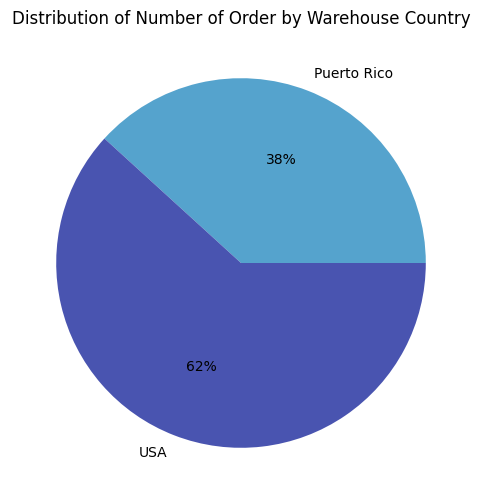

In [128]:
# Group data by year and month, and calculate the metrics
house = order.groupby(['Warehouse Country'])['Order ID'].nunique().reset_index()

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
data = house['Order ID']
labels = house['Warehouse Country']

#define Seaborn color palette to use
colors = sns.color_palette('icefire')

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Distribution of Number of Order by Warehouse Country')

plt.show()

Warehouse are located in only two places, USA and Peuter Rico which located in North and Central America. Also, orders are shipped mainly from the USA with more than 60%

_Which shipment modes are preferred by customers?_

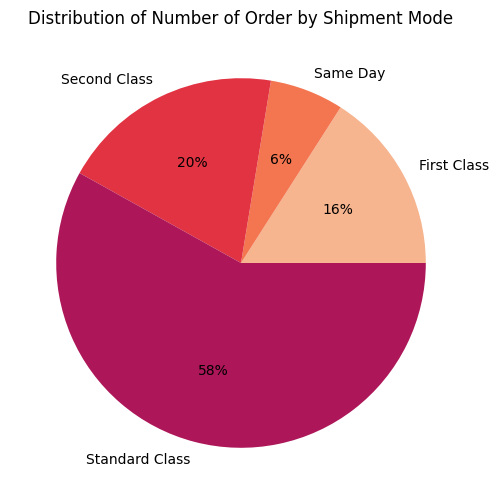

In [129]:
# Group data by year and month, and calculate the metrics
mode = order.groupby(['Shipment Mode'])['Order ID'].nunique().reset_index()

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting
data = mode['Order ID']
labels = mode['Shipment Mode']

#define Seaborn color palette to use
colors = sns.color_palette('rocket_r')

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Distribution of Number of Order by Shipment Mode')

plt.show()

It is not surprising that customers prefer to choose Standard Class, which account for 58% of the total orders.

_What is the shipping time for each shipment mode?_

In [130]:
# Group data and calculate the metrics
time = order.groupby(['Shipping Time','Shipment Mode']).agg({'Order ID':'nunique'})
time = time.sort_values(by='Shipping Time', ascending=True)

# Pivot the DataFrame
time = time.pivot_table(index='Shipping Time', columns='Shipment Mode', values='Order ID', aggfunc='first')
time

Shipment Mode,First Class,Same Day,Second Class,Standard Class
Shipping Time,,,,
0,48.0,310.0,72.0,161.0
1,55.0,269.0,61.0,139.0
2,1484.0,139.0,940.0,2890.0
3,163.0,73.0,241.0,851.0
4,144.0,80.0,825.0,2507.0
5,175.0,92.0,221.0,824.0
6,160.0,76.0,535.0,1665.0
7,4.0,3.0,10.0,13.0
8,4.0,3.0,6.0,15.0


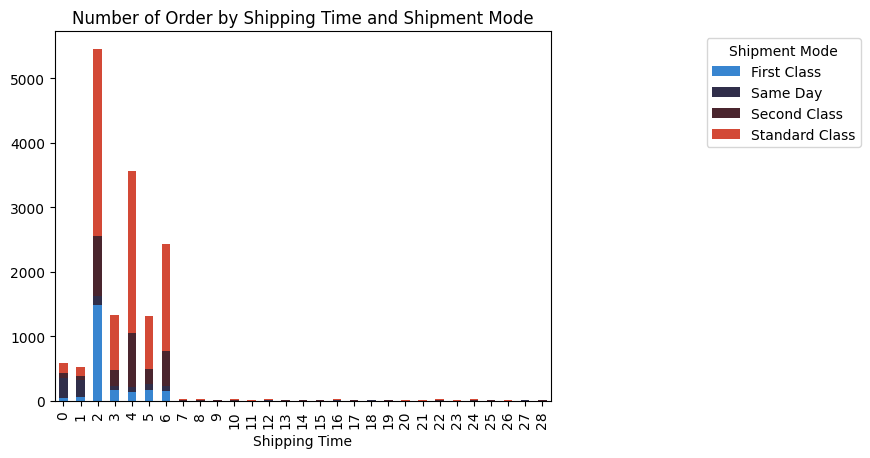

In [131]:
#Plotting
time.plot(kind='bar', stacked=True, title='Number of Order by Shipping Time and Shipment Mode', color = sns.color_palette('icefire', n_colors =4))
plt.legend(title = 'Shipment Mode', bbox_to_anchor=(1.3, 1), loc='upper left')
plt.show()

**Take away:** The company is having problems with the shipping time because there are quite a few orders that are selected for fast shipment mode such as same day and first class, but the items are shipped days later

_What is the late shipment rate by product department and market?_

In [132]:
# Calculate the number of late orders and total orders per Product Department
late = order[order['Delay Shipment'] == 'Late'].groupby('Product Department').size().reset_index(name='Late Orders')
total = order.groupby('Product Department').size().reset_index(name='Total Orders')
late_order = pd.merge(late, total, on='Product Department')

#Calculate late shipment rate by product department
late_order['Late Shipment Rate'] = late_order['Late Orders']/late_order['Total Orders']
late_order


,Product Department,Late Orders,Total Orders,Late Shipment Rate
0,Apparel,3017,6828,0.441857
1,Book Shop,20,48,0.416667
2,Discs Shop,67,167,0.401198
3,Fan Shop,4302,10168,0.423092
4,Fitness,132,338,0.390533
5,Footwear,712,1653,0.430732
6,Golf,2205,5041,0.437413
7,Health and Beauty,6,18,0.333333
8,Outdoors,605,1399,0.432452
9,Pet Shop,24,51,0.470588


Most product departments have LSR around 40%, except for Health and Beauty which goes up to more than 50%

In [133]:
# Calculate the number of late orders and total orders per Product Department
late = order[order['Delay Shipment'] == 'Late'].groupby('Customer Market').size().reset_index(name='Late Orders')
total = order.groupby('Customer Market').size().reset_index(name='Total Orders')
late_order = pd.merge(late, total, on='Customer Market')

#Calculate late shipment rate by product department
late_order['Late Shipment Rate'] = late_order['Late Orders']/late_order['Total Orders']
late_order


,Customer Market,Late Orders,Total Orders,Late Shipment Rate
0,Africa,640,1661,0.385310
1,Europe,3145,7171,0.438572
2,LATAM,3357,7788,0.431048
3,North America,1708,3873,0.441002
4,Pacific Asia,2317,5368,0.431632


It's interesting that LSRs are nearly equal in all markets, although long distances can naturally cause LSRs to increase.

_How the late shipment rate fluctuate over time?_

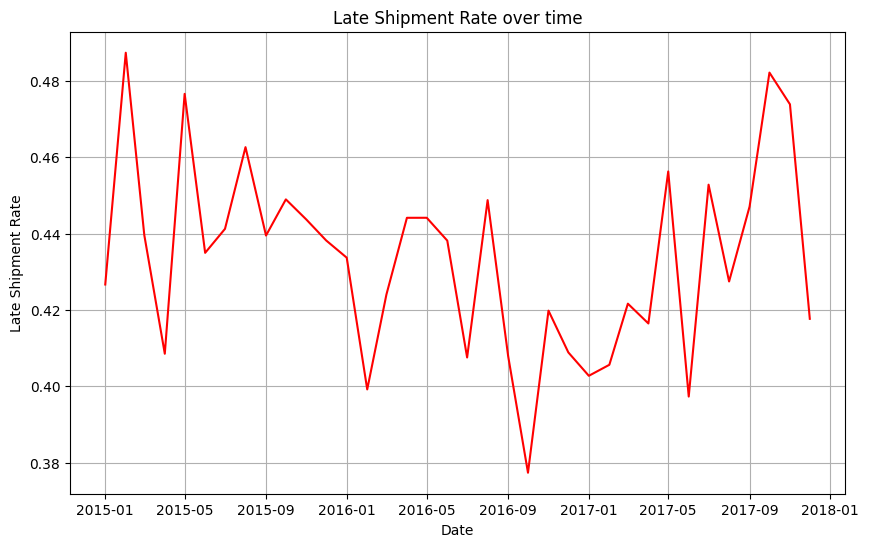

In [134]:
# Calculate the number of late orders and total orders per Product Department
late = order[order['Delay Shipment'] == 'Late'].groupby('Shipment YearMonth').size().reset_index(name='Late Orders')
total = order.groupby('Shipment YearMonth').size().reset_index(name='Total Orders')
late_order = pd.merge(late, total, on='Shipment YearMonth')

#Calculate late shipment rate by product department
late_order['Late Shipment Rate'] = late_order['Late Orders']/late_order['Total Orders']

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

#Plotting
sns.lineplot(x='Shipment YearMonth',y = 'Late Shipment Rate', data = late_order, color ='red')

plt.xlabel('Date')
plt.title('Late Shipment Rate over time')
plt.grid(True)

plt.show()

The late shipment rate has ranged from 30% to 50% over time

**Take away:** The high late shipment rate of average 40% over a long time regardless the product departments or geography, which remains concerning and indicates inefficiencies in the supply chain system that need improvement


### **Hypothesis Tree**

Based on the output of EDA, SCQ analysis was conduct to define the structure:

**Situation:** The company had relatively stable revenue and profit from 2015 to before September 2017 with revenue mainly coming from key products departments such as Apparel, Golf and Fan Shop.

**Complication:** The company's operation saw a sharp decline in Q4/2017 due to a supply chain incident resulting in no more revenue coming from key product departments.

**Question:** How can the company bounce back and re-establish business as before while also overcoming weaknesses in the supply chain?

To be able to solve the problem, it is first necessary to find out where the root cause comes from in the supply chain

Based on the output of EDA, a Hypothesis issue tree was developed

![image](image.png)

A supply chain will consist of three main components: suppliers - company - customers.

The supply chain starts with the suppliers who provide the products that the e-commerce company will sell. These could include manufacturers, distributors, or wholesalers. Supplier relationships, quality control, and timely deliveries are crucial in this supplier network. Here, we will be interested in average order fulfillment

Once the products are received from suppliers, they are stored in warehouses. Inventory management systems track stock levels, reorder points, and storage locations. Efficient warehousing and inventory management helps prevent stockouts while minimizing excess inventory. Here, we will learn more about storage cost, warehouse inventory and warehouse country

Once customers place orders, the e-commerce platform's order processing team verifies details, product availability, and shipping preferences before transmitting the information to the warehouse. There, staff pick and securely pack items from storage locations, ensuring accuracy and speed to meet customer expectations. The packed orders are then transferred to shipping partners, who may include couriers or carriers, with various options chosen to align with customer delivery expectations. So, in this section, we will need to focus on delayed shipment, delivery system as well as return and canceled order. However, the data set will only give us information about delayed shipment.

Overall, for the whole supply chain to work efficientl, demand forecasting plays a significant role in supply chain optimization. Historical sales data, customer trends, and market insights can help forecast demand accurately, reducing stockouts and excess inventory. We will also consider the demand and supply of the products

In this issue tree, I approach the problem in the most general way by dividing by internal and external factors based on the process of a supply chain. External factors here relate to customers and suppliers, which leads to two hypotheses for the supply chain problem. With internal factors directly related to the company, we will take care of product and shipment issues:

**(1) Customers changed their product preference:** Customers changed their buying behavior. Because the customer file is only about 8000 people and only about 3000 of them made a purchase before Q4/2017. Additionally, the number of customers increased sharply and changed with the market over time. Therefore, the possibility of all customers simultaneously changing their taste is possible

**(2) Supplier were not able to deliver product to the company:** Supply chain disruptions can occur on the supply network side, causing suppliers to be unable to deliver goods or deliver goods on time to the company's warehouse

**(3) The company changed their product offerings:** The company can actively change the items of its business. This can come from a company restructuring, or they test demand with new or changed items based on product life cycle analysis.

**(4) The delay shipment affected their operation and customer’s loyalty:** This can happen because the company has a high late shipmet rate. Customers therefore turn to rival companies with better delivery systems

Since we have over 50 product category and 118 product names, in order to analyze each branch of hypothesis efficiently, inventory segmentation is preferred  

## V) INVENTORY SEGMENTATION

ABC XYZ method is choosen for inventory segmentation.

ABC segment the inventory based on the value contribution of the product name (revenue). In this case, we will use Net Sales. The segmentation of ABC method is conducted as follows:

_**High value:**_ Product names account for **80%** of total net sales

**_Medium value:_** Product names account for **15%** of the rest

**_Low value:_** Product names account for **5%** of the rest

XYZ segment the inventory based on on the demand volatility. The demand volatility is measured by the coefficient of variation, which equal the standard deviation divided by the mean value

**_Regular demand:_** Product names has CV < 0.25

**_Variable/ Seasonal/ Trendy demand:_** Product names has 0.25 <= CV <= 0.5

_**Irregular demand:**_ Product names has CV > 0.5



In [135]:
#Isolate product name by product category and product department from customers' orders
product

,Product Name,Product Category,Product Department
0,Field & Stream Sportsman 16 Gun Fire Safe,Fishing,Fan Shop
157,Pelican Sunstream 100 Kayak,Water Sports,Fan Shop
294,Diamondback Women's Serene Classic Comfort Bi,Camping & Hiking,Fan Shop
418,O'Brien Men's Neoprene Life Vest,Indoor/Outdoor Games,Fan Shop
463,Team Golf Texas Longhorns Putter Grip,Accessories,Outdoors
...,...,...,...
15458,First aid kit,Health and Beauty,Health and Beauty
15464,Rock music,Music,Discs Shop
15621,Men's gala suit,Men's Clothing,Apparel
18869,Toys,Toys,Fan Shop


In [136]:
inventory

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department,Storage Cost
0,Perfect Fitness Perfect Rip Deck,2017/12,0,0.69517,Cleats,Apparel,0.00000
1,Nike Men's Dri-FIT Victory Golf Polo,2017/12,2,1.29291,Women's Apparel,Golf,2.58582
2,O'Brien Men's Neoprene Life Vest,2017/12,0,0.56531,Indoor/Outdoor Games,Fan Shop,0.00000
3,Nike Men's Free 5.0+ Running Shoe,2017/12,1,1.26321,Cardio Equipment,Footwear,1.26321
4,Under Armour Girls' Toddler Spine Surge Runni,2017/12,0,1.47648,Shop By Sport,Golf,0.00000
...,...,...,...,...,...,...,...
4195,TaylorMade 2017 Purelite Stand Bag,2015/01,0,1.44662,Golf Gloves,Outdoors,0.00000
4196,Ogio Race Golf Shoes,2015/01,0,0.10310,Golf Bags & Carts,Outdoors,0.00000
4197,GolfBuddy VT3 GPS Watch,2015/01,0,1.77747,Kids' Golf Clubs,Outdoors,0.00000
4198,Titleist Small Wheeled Travel Cover,2015/01,0,0.15244,Golf Gloves,Outdoors,0.00000


In [137]:
#Isolate product name from inventory warehouse
product_ware = inventory[['Product Name', 'Product Category', 'Product Department']]
#Drop the duplicates to have the distinct product names
product_ware = product_ware.drop_duplicates()
product_ware

,Product Name,Product Category,Product Department
0,Perfect Fitness Perfect Rip Deck,Cleats,Apparel
1,Nike Men's Dri-FIT Victory Golf Polo,Women's Apparel,Golf
2,O'Brien Men's Neoprene Life Vest,Indoor/Outdoor Games,Fan Shop
3,Nike Men's Free 5.0+ Running Shoe,Cardio Equipment,Footwear
4,Under Armour Girls' Toddler Spine Surge Runni,Shop By Sport,Golf
...,...,...,...
113,Stiga Master Series ST3100 Competition Indoor,Hockey,Fitness
114,SOLE E35 Elliptical,None,None
115,Bushnell Pro X7 Jolt Slope Rangefinder,None,None
116,SOLE E25 Elliptical,None,None


There are 113 product names from customers' order but there are 118 product names in the warehouse inventory. This ís due to 5 product names that has no demand as we have seen before. However, we can see that the inventory of these 5 products is not fixed but fluctuates over time. Thus, the company can still release these items from the warehouse. I exclude the possibility of the company donating or recycling these items as they are not the ones that can do so. I'm inclined to hypothesize that this is a systematic error in not recording orders for these items. Therefore, I decided to drop them. Dropping at this step will not affect the EDA analyzes above as these product names only affect the analyzes with the inventory table related to warehouse inventory, unit cost per unit and storage cost, not to analysis of data from the order table

In [138]:
#Using product isolation and add net sales from order table to segmentation
product_segment = order.groupby(['Product Department','Product Category','Product Name'])['Net Sales'].sum().reset_index()
product_segment

,Product Department,Product Category,Product Name,Net Sales
0,Apparel,Baby,Baby sweater,1090.91
1,Apparel,Children's Clothing,Children's heaters,1527.96
2,Apparel,Cleats,Perfect Fitness Perfect Rip Deck,540865.20
3,Apparel,Cleats,Total Gym 1400,1590.00
4,Apparel,Crafts,Porcelain crafts,19348.17
...,...,...,...,...
108,Outdoors,Women's Golf Clubs,MDGolf Pittsburgh Penguins Putter,1428.80
109,Outdoors,Women's Golf Clubs,TaylorMade White Smoke IN-12 Putter,2804.00
110,Pet Shop,Pet Supplies,Adult dog supplies,3866.52
111,Technology,Cameras,Web Camera,49046.52


In [139]:
#Calculate share of net sales
product_segment['Percent'] = product_segment['Net Sales']/total_net_sales

#Calculate cumulative share of net sales
product_segment = product_segment.sort_values(by='Percent', ascending = False)
product_segment['Cumulative'] = product_segment['Percent'].cumsum()

#ABC segmentation
product_segment['ABC Category'] = np.where(product_segment['Cumulative'] < 0.8, 'A [High value]',
                                np.where((product_segment['Cumulative'] >= 0.8) & (product_segment['Cumulative'] <                                            0.95), 'B [Medium value]',
                                         'C [Low value]'))
product_segment

,Product Department,Product Category,Product Name,Net Sales,Percent,Cumulative,ABC Category
14,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,965748.00,0.209761,0.209761,A [High value]
13,Fan Shop,Camping & Hiking,Diamondback Women's Serene Classic Comfort Bi,551430.00,0.119771,0.329532,A [High value]
2,Apparel,Cleats,Perfect Fitness Perfect Rip Deck,540865.20,0.117476,0.447008,A [High value]
21,Fan Shop,Water Sports,Pelican Sunstream 100 Kayak,470448.00,0.102182,0.549190,A [High value]
56,Golf,Women's Apparel,Nike Men's Dri-FIT Victory Golf Polo,418185.50,0.090830,0.640020,A [High value]
...,...,...,...,...,...,...,...
19,Fan Shop,Toys,Toys,782.76,0.000170,0.999470,C [Low value]
25,Fitness,Basketball,Diamondback Boys' Insight 24 Performance Hybr,741.00,0.000161,0.999631,C [Low value]
93,Outdoors,Kids' Golf Clubs,Garmin Approach S4 Golf GPS Watch,702.00,0.000152,0.999783,C [Low value]
72,Outdoors,Golf Apparel,Cleveland Golf Women's 588 RTX CB Satin Chrom,579.60,0.000126,0.999909,C [Low value]


In [140]:
# Calculate coefficient of variation by Product Name
CV = order.groupby('Product Name')['Net Sales'].apply(lambda x: x.std() / x.mean()).reset_index()
CV.rename(columns={'Net Sales': 'CV'}, inplace=True)

#Add CV column to product_segment
product_segment = pd.merge(product_segment, CV, on='Product Name')
product_segment

#XYZ segmentation
product_segment['XYZ Category'] = np.where(product_segment['CV'] < 0.25, 'X [Regular demand]',
                                np.where((product_segment['CV'] >= 0.25) &  (product_segment['CV'] <= 0.5), 'Y [Variable demand]',
                                         'Z [Irregular demand]'))
product_segment

,Product Department,Product Category,Product Name,Net Sales,Percent,Cumulative,ABC Category,CV,XYZ Category
0,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,965748.00,0.209761,0.209761,A [High value],0.077699,X [Regular demand]
1,Fan Shop,Camping & Hiking,Diamondback Women's Serene Classic Comfort Bi,551430.00,0.119771,0.329532,A [High value],0.078438,X [Regular demand]
2,Apparel,Cleats,Perfect Fitness Perfect Rip Deck,540865.20,0.117476,0.447008,A [High value],0.495370,Y [Variable demand]
3,Fan Shop,Water Sports,Pelican Sunstream 100 Kayak,470448.00,0.102182,0.549190,A [High value],0.078101,X [Regular demand]
4,Golf,Women's Apparel,Nike Men's Dri-FIT Victory Golf Polo,418185.50,0.090830,0.640020,A [High value],0.476291,Y [Variable demand]
...,...,...,...,...,...,...,...,...,...
108,Fan Shop,Toys,Toys,782.76,0.000170,0.999470,C [Low value],0.080233,X [Regular demand]
109,Fitness,Basketball,Diamondback Boys' Insight 24 Performance Hybr,741.00,0.000161,0.999631,C [Low value],0.078086,X [Regular demand]
110,Outdoors,Kids' Golf Clubs,Garmin Approach S4 Golf GPS Watch,702.00,0.000152,0.999783,C [Low value],0.066617,X [Regular demand]
111,Outdoors,Golf Apparel,Cleveland Golf Women's 588 RTX CB Satin Chrom,579.60,0.000126,0.999909,C [Low value],0.041148,X [Regular demand]


In [141]:
#ABC XYZ segmentation
product_segment['ABCXYZ'] = product_segment['XYZ Category'].str[0] + product_segment['ABC Category'].str[0]
product_segment

,Product Department,Product Category,Product Name,Net Sales,Percent,Cumulative,ABC Category,CV,XYZ Category,ABCXYZ
0,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,965748.00,0.209761,0.209761,A [High value],0.077699,X [Regular demand],XA
1,Fan Shop,Camping & Hiking,Diamondback Women's Serene Classic Comfort Bi,551430.00,0.119771,0.329532,A [High value],0.078438,X [Regular demand],XA
2,Apparel,Cleats,Perfect Fitness Perfect Rip Deck,540865.20,0.117476,0.447008,A [High value],0.495370,Y [Variable demand],YA
3,Fan Shop,Water Sports,Pelican Sunstream 100 Kayak,470448.00,0.102182,0.549190,A [High value],0.078101,X [Regular demand],XA
4,Golf,Women's Apparel,Nike Men's Dri-FIT Victory Golf Polo,418185.50,0.090830,0.640020,A [High value],0.476291,Y [Variable demand],YA
...,...,...,...,...,...,...,...,...,...,...
108,Fan Shop,Toys,Toys,782.76,0.000170,0.999470,C [Low value],0.080233,X [Regular demand],XC
109,Fitness,Basketball,Diamondback Boys' Insight 24 Performance Hybr,741.00,0.000161,0.999631,C [Low value],0.078086,X [Regular demand],XC
110,Outdoors,Kids' Golf Clubs,Garmin Approach S4 Golf GPS Watch,702.00,0.000152,0.999783,C [Low value],0.066617,X [Regular demand],XC
111,Outdoors,Golf Apparel,Cleveland Golf Women's 588 RTX CB Satin Chrom,579.60,0.000126,0.999909,C [Low value],0.041148,X [Regular demand],XC


In [142]:
#Count the product name of each segmentation
count = product_segment.groupby(['ABCXYZ'])['ABCXYZ'].count()
print(count, 'Result of Segmentation')

ABCXYZ
XA     4
XB     6
XC    40
YA     2
YB     7
YC    28
ZB     1
ZC    25
Name: ABCXYZ, dtype: int64 Result of Segmentation


9 combinations are expected from ABC XYZ method, but only 8 appear. We don't have any product name that falls into ZA segment

In [143]:
#Segmentation by Product Department
depart = product_segment.groupby(['ABCXYZ','Product Department'])['Product Name'].count().reset_index()
depart

# Pivot the DataFrame
depart = depart.pivot_table(index='ABCXYZ', columns='Product Department', values='Product Name', aggfunc='first')
depart

Product Department,Apparel,Book Shop,Discs Shop,Fan Shop,Fitness,Footwear,Golf,Health and Beauty,Outdoors,Pet Shop,Technology
ABCXYZ,,,,,,,,,,,
XA,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XB,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0
XC,4.0,1.0,3.0,3.0,5.0,2.0,1.0,1.0,18.0,1.0,1.0
YA,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
YB,NaN,NaN,NaN,1.0,1.0,1.0,2.0,NaN,2.0,NaN,NaN
YC,NaN,NaN,NaN,1.0,4.0,3.0,2.0,NaN,18.0,NaN,NaN
ZB,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
ZC,NaN,NaN,NaN,1.0,3.0,6.0,2.0,NaN,13.0,NaN,NaN


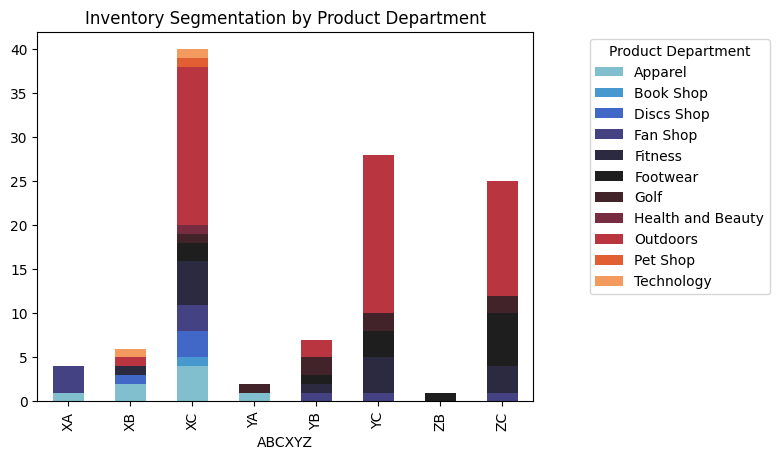

In [144]:
#Plotting
depart.plot(kind='bar', stacked=True, title='Inventory Segmentation by Product Department', color = sns.color_palette('icefire', n_colors =11))
plt.legend(title = 'Product Department', bbox_to_anchor=(1.1, 1), loc='upper left')
plt.show()

## VI) EXPLORATORY ANALYSIS 2

First, let's add the segmentation into the order, inventory and fulfillment table

In [145]:
#Add segmentation into order table
iso = product_segment[['Product Name', 'ABCXYZ']]
order_segment = pd.merge(order, iso, on = 'Product Name', how = 'left')
order_segment

,Order ID,Order YearMonth,Order Year,Order Month,Order Day,Order Quantity,Product Department,Product Category,Product Name,Customer ID,...,Discount %,Profit,Order Date,Shipment Date,Shipment YearMonth,Shipping Time,Delay Shipment,Net Sales,Unit Price,ABCXYZ
0,3535,2015-02-01,2015,2,21,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,7840,...,0.25,200.0,2015/02/21,2015-02-27,2015-02-01,6,Late,300.00,400.0,XA
1,4133,2015-03-01,2015,3,2,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,1203,...,0.09,200.0,2015/03/02,2015-03-06,2015-03-01,4,On time,364.00,400.0,XA
2,7396,2015-04-01,2015,4,18,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,10866,...,0.06,200.0,2015/04/18,2015-04-20,2015-04-01,2,On time,376.00,400.0,XA
3,11026,2015-06-01,2015,6,10,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,...,0.15,200.0,2015/06/10,2015-06-12,2015-06-01,2,On time,340.00,400.0,XA
4,11026,2015-06-01,2015,6,10,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,...,0.13,200.0,2015/06/10,2015-06-12,2015-06-01,2,On time,348.00,400.0,XA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25856,73246,2017-12-01,2017,12,5,1,Fan Shop,Toys,Toys,16799,...,0.06,6.0,2017/12/05,2017-12-11,2017-12-01,6,Late,11.28,12.0,XC
25857,7908,2015-04-01,2015,4,26,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,11950,...,0.12,68.0,2015/04/26,2015-04-30,2015-04-01,4,On time,26.40,30.0,ZC
25858,29326,2016-03-01,2016,3,4,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,8161,...,0.09,68.0,2016/03/04,2016-03-06,2016-03-01,2,On time,27.30,30.0,ZC
25859,63308,2017-07-01,2017,7,13,1,Fan Shop,Hunting & Shooting,insta-bed Neverflat Air Mattress,5733,...,0.02,60.0,2017/07/13,2017-07-17,2017-07-01,4,Late,147.00,150.0,XC


In [146]:
#Add segmentation to inventory table
inventory_segment = pd.merge(inventory, iso, on = 'Product Name', how = 'left')
inventory_segment

,Product Name,Year Month,Warehouse Inventory,Inventory Cost Per Unit,Product Category,Product Department,Storage Cost,ABCXYZ
0,Perfect Fitness Perfect Rip Deck,2017/12,0,0.69517,Cleats,Apparel,0.00000,YA
1,Nike Men's Dri-FIT Victory Golf Polo,2017/12,2,1.29291,Women's Apparel,Golf,2.58582,YA
2,O'Brien Men's Neoprene Life Vest,2017/12,0,0.56531,Indoor/Outdoor Games,Fan Shop,0.00000,YB
3,Nike Men's Free 5.0+ Running Shoe,2017/12,1,1.26321,Cardio Equipment,Footwear,1.26321,ZB
4,Under Armour Girls' Toddler Spine Surge Runni,2017/12,0,1.47648,Shop By Sport,Golf,0.00000,YB
...,...,...,...,...,...,...,...,...
4195,TaylorMade 2017 Purelite Stand Bag,2015/01,0,1.44662,Golf Gloves,Outdoors,0.00000,XC
4196,Ogio Race Golf Shoes,2015/01,0,0.10310,Golf Bags & Carts,Outdoors,0.00000,XC
4197,GolfBuddy VT3 GPS Watch,2015/01,0,1.77747,Kids' Golf Clubs,Outdoors,0.00000,XC
4198,Titleist Small Wheeled Travel Cover,2015/01,0,0.15244,Golf Gloves,Outdoors,0.00000,XC


In [147]:
#Add segmentation to inventory table
fulfillment_segment = pd.merge(fulfillment, iso, on = 'Product Name', how = 'left')
fulfillment_segment

,Product Name,Warehouse Order Fulfillment (days),ABCXYZ
0,adidas Men's Germany Black Crest Away Tee,1.0,ZC
1,Diamondback Girls' Clarity 24 Hybrid Bike 201,1.0,XC
2,Total Gym 1400,1.3,XC
3,Mio ALPHA Heart Rate Monitor/Sport Watch,1.3,XC
4,LIJA Women's Button Golf Dress,1.4,XC
...,...,...,...
113,LIJA Women's Eyelet Sleeveless Golf Polo,9.5,YB
114,Bridgestone e6 Straight Distance NFL Tennesse,9.5,ZC
115,Elevation Training Mask 2.0,9.8,YC
116,Titleist Pro V1x Golf Balls,9.9,YB


_What are the characteristics of each inventory segment?_

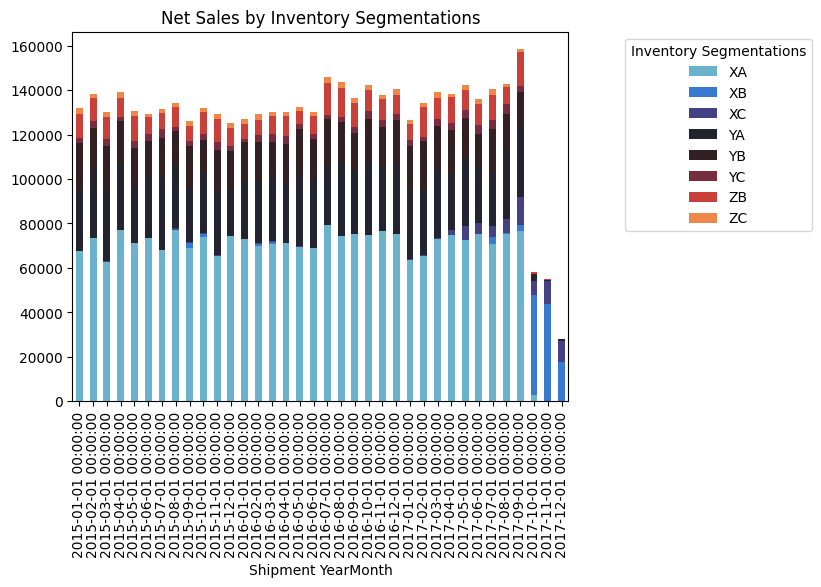

In [148]:
order_segment['Shipment YearMonth'] = pd.to_datetime(order_segment['Shipment YearMonth'], format='%Y/%m')

#Calculate total net sales for each segment
sale_segment = order_segment.groupby(['Shipment YearMonth','ABCXYZ'])['Net Sales'].sum().reset_index()
sale_segment
# Pivot the DataFrame
sale_segment = sale_segment.pivot_table(index='Shipment YearMonth', columns='ABCXYZ', values='Net Sales', aggfunc='first')
sale_segment

#Plotting
sale_segment.plot(kind='bar', stacked=True, title='Net Sales by Inventory Segmentations', color = sns.color_palette('icefire', n_colors =8))
plt.legend(title = 'Inventory Segmentations', bbox_to_anchor=(1.1, 1), loc='upper left')
plt.show()

Inventory segments have opposite characteristics during the period of the incident. As we expected, XA and YA were the main drivers of the company's revenue growth. While XA and YA are gone. XB became the main segment contributing to the company's net sales but gradually decreasing. Although XC is small, there is a gradual increase

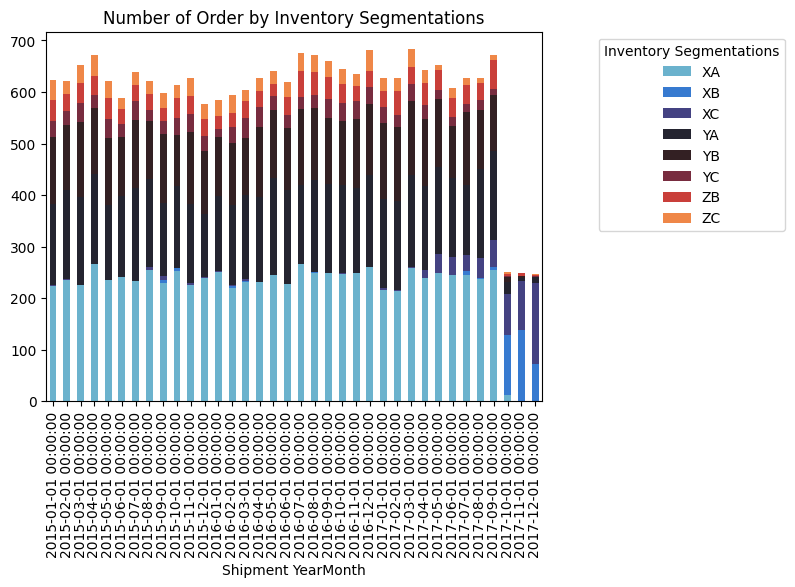

In [149]:
# Calculate total number of order for each segment
num_segment = order_segment.groupby(['Shipment YearMonth','ABCXYZ'])['Order ID'].nunique().reset_index()

# Pivot the DataFrame
num_segment = num_segment.pivot_table(index='Shipment YearMonth', columns='ABCXYZ', values='Order ID', aggfunc='first')

# Plotting
num_segment.plot(kind='bar', stacked=True, title='Number of Order by Inventory Segmentations', color = sns.color_palette('icefire', n_colors =8))
plt.legend(title = 'Inventory Segmentations', bbox_to_anchor=(1.1, 1), loc='upper left')
plt.show()

The trend continues to become more apparent when we look at the number of orders. XB and XC saw a significant increase in orders around Q4/2017. While XB's orders dropped after that, XC's orders showed a significant increase

/tmp/ipython-input-3770786500.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(unit_segment, x='ABCXYZ', y='Unit Price', palette='icefire')


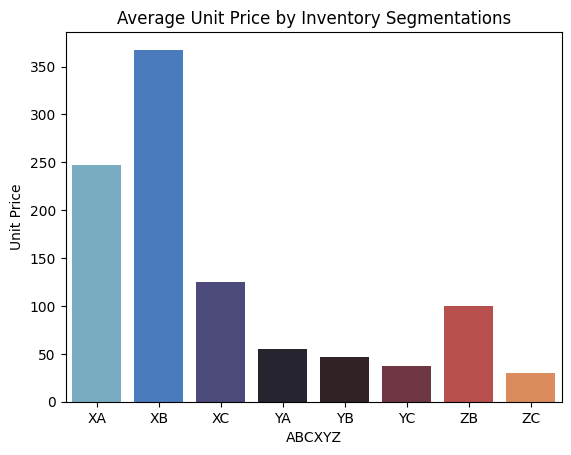

In [150]:
# Calculate unit price for each segment
unit_segment = order_segment.groupby(['ABCXYZ'])['Unit Price'].mean().reset_index()

# Plotting
sns.barplot(unit_segment, x='ABCXYZ', y='Unit Price', palette='icefire')
plt.title('Average Unit Price by Inventory Segmentations')
plt.show()

XB is the segment with the highest average unit price (>350) that outperforms other segments. In second place is XA with an average unit price of 250. XB and XC have values between 100 - 150 while the rest of the segments have low values below 100.

/tmp/ipython-input-1535884153.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(unit_segment, x='ABCXYZ', y='Order Quantity', palette='icefire')


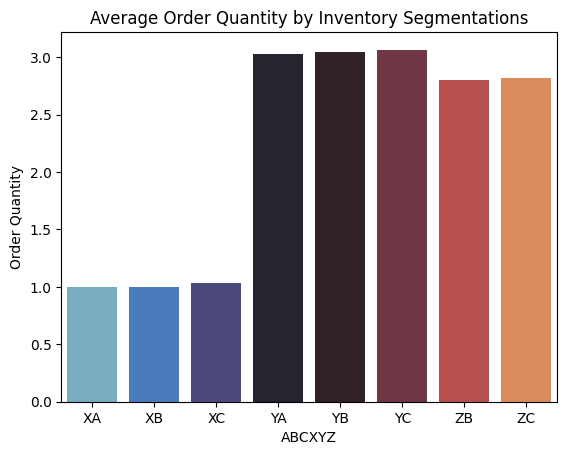

In [151]:
# Calculate average order quantity for each segment
unit_segment = order_segment.groupby(['ABCXYZ'])['Order Quantity'].mean().reset_index()

# Plotting
sns.barplot(unit_segment, x='ABCXYZ', y='Order Quantity', palette='icefire')
plt.title('Average Order Quantity by Inventory Segmentations')
plt.show()

The segments with regular demand have a small number of product quantity in an order (1 quantity per order). While products with seasonal or trendy or irregular demand have a high number of order quantity per product (customers order many quantity of that product at the same time)

**Take away:** There is a tendency to shift from old inventory segments to new ones. This trend can come from customers or from the company itself. Although XA and YA are the same old best selling products, they are differences in nature. XA has a much higher value of products in each order, but the number of items in each order is less. Meanwhile, the opposite is true for YA. XB's characteristics are quite similar to XA's with high product value resulting in low order quantity per order. The phase inversion between these two factors holds true for the remaining segments. However, XC does not show an inverse trend between product value and product quantity. Although the product value falls in the middle and third highest, the quantity ordered is only 1 per order.

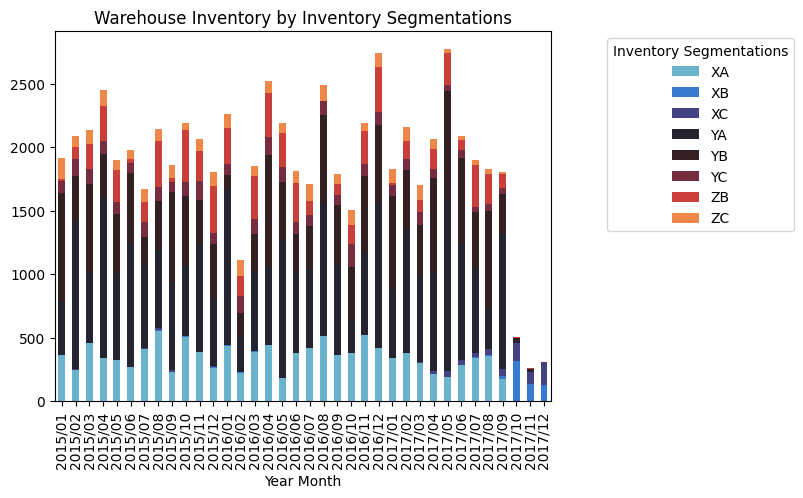

In [152]:
# Calculate total inventory for each segment
ware_segment = inventory_segment.groupby(['Year Month','ABCXYZ'])['Warehouse Inventory'].sum().reset_index()

# Pivot the DataFrame
ware_segment = ware_segment.pivot_table(index='Year Month', columns='ABCXYZ', values='Warehouse Inventory', aggfunc='first')

# Plotting
ware_segment.plot(kind='bar', stacked=True, title='Warehouse Inventory by Inventory Segmentations', color = sns.color_palette('icefire', n_colors =8))
plt.legend(title = 'Inventory Segmentations', bbox_to_anchor=(1.1, 1), loc='upper left')
plt.show()

XB has just been stocked in Q4/2017 while XC has been in stock since May 2017. The remaining segments, especially XA and YA, have suddenly disappeared from the warehouse

/tmp/ipython-input-3353714838.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(cost_segment, x='ABCXYZ', y='Inventory Cost Per Unit', palette='icefire')


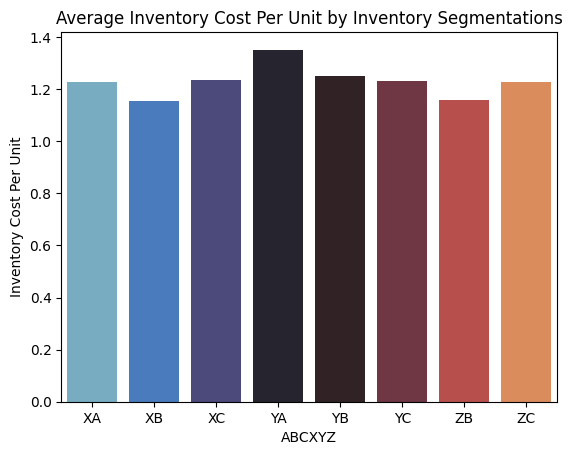

In [153]:
# Calculate average unit cost for each segment
cost_segment = inventory_segment.groupby(['ABCXYZ'])['Inventory Cost Per Unit'].mean().reset_index()

# Plotting
sns.barplot(cost_segment, x='ABCXYZ', y='Inventory Cost Per Unit', palette='icefire')
plt.title('Average Inventory Cost Per Unit by Inventory Segmentations')
plt.show()

There is no significant disparity in the average inventory cost per product unit across segments

/tmp/ipython-input-835722849.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(fill_segment, x='ABCXYZ', y='Warehouse Order Fulfillment (days)', palette='icefire')


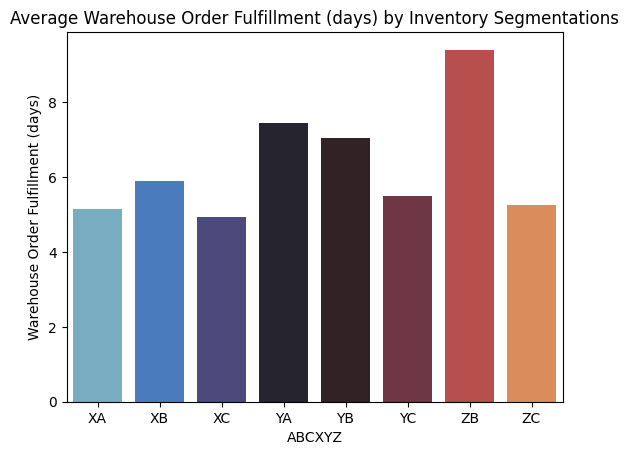

In [154]:
# Calculate average unit cost for each segment
fill_segment = fulfillment_segment.groupby(['ABCXYZ'])['Warehouse Order Fulfillment (days)'].mean().reset_index()

# Plotting
sns.barplot(fill_segment, x='ABCXYZ', y='Warehouse Order Fulfillment (days)', palette='icefire')
plt.title('Average Warehouse Order Fulfillment (days) by Inventory Segmentations')
plt.show()

The segments with regular demand (XA, XB, XC) have quite fast replenishment time (4 - 6 days). Segments with variable demand have higher inventory fill times (6 - 8 days). The ZB segment, which has unusual demand, has the highest replenishment time (more than 1 week). However, the ZC segment's replenishing time is only about 6 days.

In [155]:
# Calculate the number of late orders and total orders per Product Department
late_segment = order_segment[order_segment['Delay Shipment'] == 'Late'].groupby('ABCXYZ').size().reset_index(name='Late Orders')
total_segment = order_segment.groupby('ABCXYZ').size().reset_index(name='Total Orders')
late_order_segment = pd.merge(late_segment, total_segment, on='ABCXYZ')

#Calculate late shipment rate by product department
late_order_segment['Late Shipment Rate'] = late_order_segment['Late Orders']/late_order_segment['Total Orders']
late_order_segment

,ABCXYZ,Late Orders,Total Orders,Late Shipment Rate
0,XA,4576,10723,0.426746
1,XB,165,360,0.458333
2,XC,267,601,0.444260
3,YA,2794,6386,0.437520
4,YB,2023,4659,0.434213
5,YC,397,952,0.417017
6,ZB,535,1256,0.425955
7,ZC,410,924,0.443723


For all segments, the average late shipment rate is around 40%.

### Testing the hypothesis

**With the first hypothesis:** Customers changed their product preference, we will test the supply vs demand for the segments to see if customers really change their taste. Demand will be measured by the order quantity of the segment and supply will be measured by available inventory in the warehouse.

In [156]:
inventory_segment['Year Month'].unique()

array(['2017/12', '2017/11', '2017/10', '2017/09', '2017/08', '2017/07',
       '2017/06', '2017/05', '2017/04', '2017/03', '2017/02', '2017/01',
       '2016/12', '2016/11', '2016/10', '2016/09', '2016/08', '2016/07',
       '2016/06', '2016/05', '2016/04', '2016/03', '2016/02', '2016/01',
       '2015/12', '2015/11', '2015/10', '2015/09', '2015/08', '2015/07',
       '2015/06', '2015/05', '2015/04', '2015/03', '2015/02', '2015/01'],
      dtype=object)

In [157]:
order_segment['Order YearMonth'] = order_segment['Order YearMonth'].dt.strftime('%Y/%m')
order_segment['Order YearMonth'].unique()

array(['2015/02', '2015/03', '2015/04', '2015/06', '2015/10', '2015/11',
       '2015/12', '2016/01', '2016/02', '2016/03', '2016/05', '2016/06',
       '2016/07', '2016/08', '2016/09', '2016/12', '2017/02', '2017/03',
       '2017/05', '2017/07', '2017/09', '2017/08', '2015/08', '2016/10',
       '2016/11', '2017/01', '2017/06', '2015/01', '2016/04', '2017/04',
       '2015/09', '2015/05', '2015/07', '2017/10', '2017/11', '2017/12'],
      dtype=object)

In [158]:
# Calculate order quantity for each segment
quant_segment = order_segment.groupby(['Order YearMonth','ABCXYZ'])['Order Quantity'].sum().reset_index()
quant_segment.sort_values(by=['Order YearMonth','ABCXYZ'], ascending = True)
# Calculate warehouse inventory for each segment
inv_segment = inventory_segment.groupby(['Year Month','ABCXYZ'])['Warehouse Inventory'].sum().reset_index()
inv_segment.sort_values(by=['Year Month','ABCXYZ'], ascending = True)

# Merge based on keys 'ABCXYZ' and 'Year Month'
supply_demand = pd.merge(quant_segment, inv_segment, left_on=['Order YearMonth','ABCXYZ'], right_on=['Year Month','ABCXYZ'])
supply_demand = supply_demand.drop(columns = ['Year Month'])
supply_demand

,Order YearMonth,ABCXYZ,Order Quantity,Warehouse Inventory
0,2015/01,XA,332,361
1,2015/01,XC,2,2
2,2015/01,YA,636,418
3,2015/01,YB,563,854
4,2015/01,YC,95,97
...,...,...,...,...
246,2017/12,XB,70,123
247,2017/12,XC,149,178
248,2017/12,YA,9,2
249,2017/12,ZB,1,1


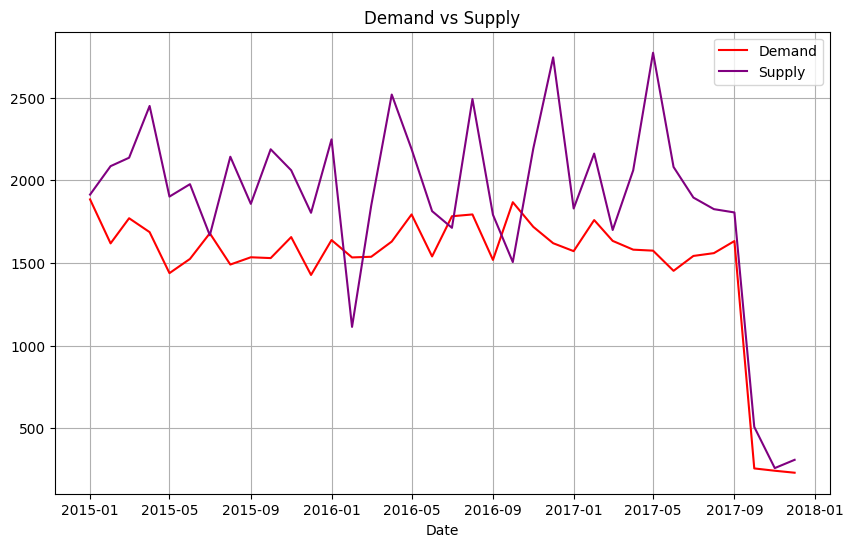

In [159]:
supply_demand['Order YearMonth'] = pd.to_datetime(supply_demand['Order YearMonth'], format ='%Y/%m')
# Calculate total demand and supply over time
total_supply_demand = supply_demand.groupby(['Order YearMonth']).agg({'Order Quantity':'sum',
                                                                     'Warehouse Inventory':'sum'})
# Plotting two lines on the same chart
plt.figure(figsize=(10, 6))

plt.plot(total_supply_demand.index, total_supply_demand['Order Quantity'], label='Demand', color='red')
plt.plot(total_supply_demand.index, total_supply_demand['Warehouse Inventory'], label='Supply', color='purple')

plt.xlabel('Date')
plt.title('Demand vs Supply')
plt.grid(True)
plt.legend()
plt.show()

**Take away:** The company is frequently having excessive inventory or overstocked, even during periods of sharp declines. Often, it is necessary to overstock inventory for backup. But there are times when the company's inventory is up to 30% higher than actual demand. The company needs to improve the inventory management to prevent this situation.

We will focus on the XA and YA analysis, as these are the two segments that disappeared from the map in Q4/2017

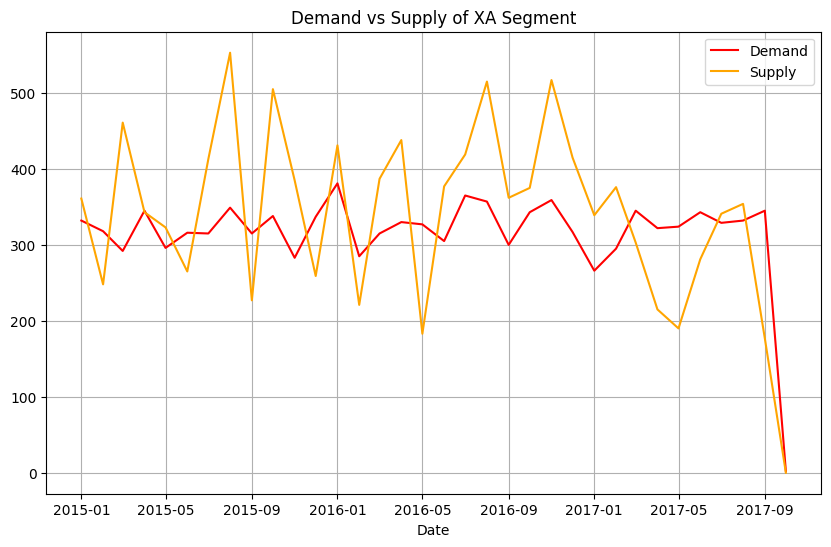

In [160]:
#Isolate order quantity and warehouse inventory for XA
xa = supply_demand[supply_demand['ABCXYZ']=='XA']

# Plotting two lines on the same chart
plt.figure(figsize=(10, 6))

plt.plot(xa['Order YearMonth'], xa['Order Quantity'], label='Demand', color='red')
plt.plot(xa['Order YearMonth'], xa['Warehouse Inventory'], label='Supply', color='orange')

plt.xlabel('Date')
plt.title('Demand vs Supply of XA Segment')
plt.grid(True)
plt.legend()
plt.show()

The XA segment continued to track orders despite falling warehouse inventory (09/2017). Inventory then dropped to zero, accompanied with order disappearance, indicating segment removal from the sales page, preventing further orders from customers

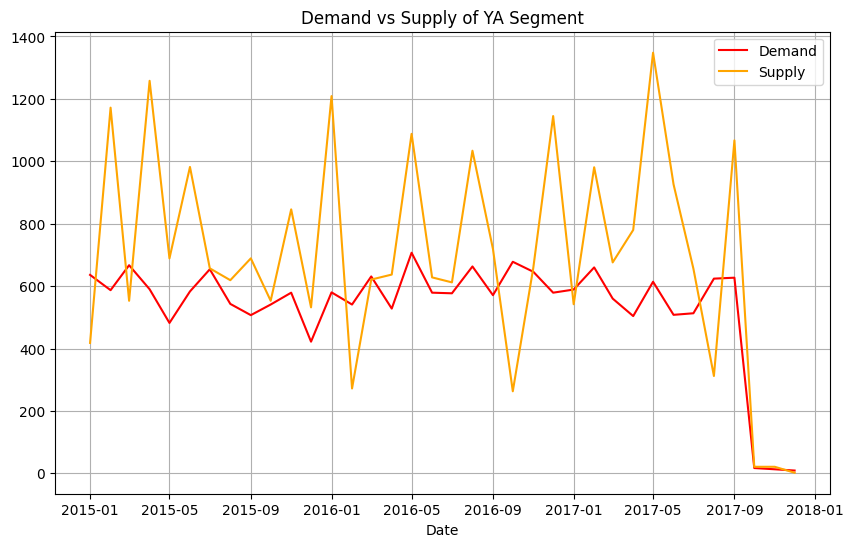

In [161]:
#Isolate order quantity and warehouse inventory for XA
ya = supply_demand[supply_demand['ABCXYZ']=='YA']

# Plotting two lines on the same chart
plt.figure(figsize=(10, 6))

plt.plot(ya['Order YearMonth'], ya['Order Quantity'], label='Demand', color='red')
plt.plot(ya['Order YearMonth'], ya['Warehouse Inventory'], label='Supply', color='orange')

plt.xlabel('Date')
plt.title('Demand vs Supply of YA Segment')
plt.grid(True)
plt.legend()
plt.show()

The YA segment showed that warehousing inventory and order quantities both unexpectedly dropped sharply.

**Take away:** Supply usually has a drop before demand declines. But it is worth mentioning here that, as long as there is inventory, there will still be demand for orders from customers. This decline was _**not due to changing customer preferences, but rather a supply chain issue from supply side**_

**With the second hypothesis:** Supplier were not able to deliver product to the company, I think this is **_most likely the root cause_**. This cause may explain the sudden severance of the XA and YA segments. The company likely tried to find an alternative supplier and in the meantime opted to test-sell XB and XC segment.

**With the third hypothesis:** The company changed their product offerings, let's take a look at the graph of warehouse inventory by inventory segmentations again. There were no apparent reductions in storage costs and warehouse inventory for two XA and YA segments in previous years. The decline in these segments was abrupt, almost to the point of disappearance. Also, it is not really reasonable and rational for the company to actively remove best - selling items (80% of total net sales) from their business immediately without testing. Such abrupt removal is very risky! It _**might not an intentional strategic move**_ by the company to alter its product offerings. However, the dataset only provides information for a period of 3 years. The behavior of changing categories can take place in a longer cycle due to the product life cycle. Therefore, it’s need more investigation

**With the fourth hypothesis:** The delay shipment affected their operation and customer’s loyalty. The late shipment rate has maintained ranging from 30% to 50% for a prolonged period. But the number of customers only witnessed a sudden fall during Q4/2017, not to mention it's cyclical. Net sales also remained stable even though LSR fluctuated and only dropped sharply at that time. **_Late shipments may not be the primary root cause of the overall decline in business performance during that period_**

However, the high LSR of 40% ís really concerning. So we would like to see what makes this rate so high? The cause of delayed shipment can come from the delay in delivery from the supplier to the warehouse and the way from the warehouse to the customer. With this dataset, we will see _if there is a correlation between average order fulfillment and late shipment rate?_

/tmp/ipython-input-2316387806.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


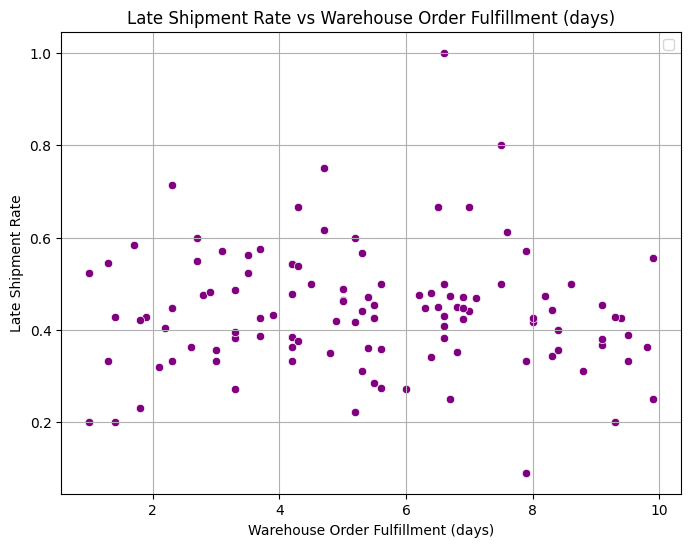

In [162]:
# Calculate the number of late orders and total orders per Product Name
late1 = order[order['Delay Shipment'] == 'Late'].groupby('Product Name').size().reset_index(name='Late Orders')
total1 = order.groupby('Product Name').size().reset_index(name='Total Orders')
late_order1 = pd.merge(late1, total1, on='Product Name')

#Calculate late shipment rate by Product Name
late_order1['Late Shipment Rate'] = late_order1['Late Orders']/late_order1['Total Orders']
late_order1

#add average order fulfillment
supply_net = pd.merge(late_order1, fulfillment, on = 'Product Name')

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data = supply_net, x='Warehouse Order Fulfillment (days)', y= 'Late Shipment Rate', color='purple', marker='o')

# Add labels and title
plt.xlabel('Warehouse Order Fulfillment (days)')
plt.ylabel('Late Shipment Rate')
plt.title('Late Shipment Rate vs Warehouse Order Fulfillment (days)')
plt.grid(True)
plt.legend()
plt.show()

We would expect that a product name with a high average order fulfillment will have a high LSR. But the graph shows no correlation between the two variables

**Take away:** The late shipments are not directly linked to the order fulfillment time but rather point to issues within the company's delivery system (shipping from warehouse to the customer). In the EDA, the late shipment rate in different markets is similar, showing that this situation seems to happen in general, regardless of geography. The company will need to improve its delivery system

## **SUGGESTIONS**

So far, we have accomplished the targets required by the business regarding supply chain inefficiencies and potential problems:

**1. Sharp decline in revenue and profit:** The most likely root cause of business downturn comes from a supply chain disruption on the supplier network such as delays in sourcing, transportation, distribution or problem with suppliers could have affected the company's ability to replenish the warehouse inventory promptly, especially for the products of XA and YA segments.

**2. Overstock and Understock:** The company often encounters overstock situation, causing excess inventory and wasting storage costs. Sometimes the company is also understocked. This shows that inventory management is not really implemented effectively yet

**3. High late shipment rate:** The company has a rather concerning late shipment rate (30 - 50%) which related to the delivery system

#Recommendations

##1. Restore Revenue and Profit (by inventory segmentation):

XA, YA:
These two segments have always shown strong customer demand and have been key revenue drivers. Getting them back on track should be a top priority. To do this, the company should work on finding reliable alternative suppliers and redesigning the supply chain to prevent disruptions like the one in Q4/2017.

It’s important to analyze where exactly the supply chain broke down and source from suitable regions. For example, apparel products typically come from Southeast Asia, West Asia, and Central America, while electronics often come from North America and East Asia. Pinpointing the disruption source will help ensure a smoother supply chain in the future.

XB, XC:
These segments have shown promising growth potential, especially during the disruption period when they carried most of the company’s revenue. The next step should be to conduct thorough market research to understand current consumption patterns and emerging trends, both locally and globally.

Keeping an eye on how these segments evolve and forecasting demand will help in optimizing inventory and tapping into potential opportunities.

YB, YC, ZB, ZC:
These segments contribute very little to revenue and face low demand. It would be wise to either discontinue them or significantly reduce inventory levels to cut down storage costs.

##2. Managing Overstock and Understock:

If demand forecasting tools are available, they should be used to analyze past sales data, market trends, and customer demand patterns. Predictive analytics can help maintain the right inventory balance—avoiding both stockouts and excess inventory.

Setting up reorder points based on lead times, sales velocity, and safety stock will ensure timely restocking. Maintaining a safety stock buffer is especially important to handle unexpected demand surges or supply delays while minimizing excess storage costs.

Since customer demand varies by region—like Asia Pacific peaking in Q4/2017 and Europe earlier—the company should use this historical cycle to plan inventory levels for each region more accurately. For example, Asia Pacific might dominate in Q1/2018, followed by North America in later quarters.

##3. Reducing Late Shipment Rates:

To bring down late shipments, the company should adopt a multi-step strategy:

Redesign transportation routes using methods like cross-docking to streamline the shipping process.

Partner with local logistics companies in distant markets to leverage their expertise and infrastructure.

Establish a warehouse in a strategic hub like Singapore for the Asian market. This will speed up deliveries, cut shipping times, and support global expansion efforts.